# T-cell chemokine microarrays differential expression analysis

## Index

1. [Experimental design](#Experimental-design)
2. [Loading libraries, dependencies and data](#Loading-libraries,-dependencies-and-data)
4. [Boxplot of log2 intensities for the raw data](#Boxplot-of-log2-intensities-for-the-raw-data)
5. [Background normalization](#Background-normalization)
6. [PCA plot](#PCA-plot)
7. [tSNE plot](#tSNE-plot)
8. [Intensity based filtering](#Intensity-based-filtering)
9. [Annotation for MTA 1.0](#Annotation)
10. [DE-analysis-using-limma](#DE-analysis-using-limma)
11. [Volcano plot of differentially expressed genes](#Volcano-plot-of-differentially-expressed-genes)
13. [Heatmap of 100 most variable genes](#Heatmap-of-100-most-variable-genes)
14. [Enrichment analysis](#Enrichment-analysis)
15. [Session info](#Session-info)

## Experimental design

| Chip   | Filename                     | Day post infection | Treatment      | Tissue |
|--------|------------------------------|--------------------|----------------|--------|
| 1      | eberlein_d8_1_Mouse430_2.CEL | 8                  | ex vivo        | spleen |
| 2      | eberlein_d8_2_Mouse430_2.CEL | 8                  | ex vivo        | spleen |
| 3      | eberlein_d8_3_Mouse430_2.CEL | 8                  | ex vivo        | spleen |
| 4      | eberlein_d8_4_Mouse430_2.CEL | 8                  | 3h stimulation | spleen |
| 5      | eberlein_d8_5_Mouse430_2.CEL | 8                  | 3h stimulation | spleen |
| 6      | eberlein_d8_6_Mouse430_2.CEL | 8                  | 3h stimulation | spleen |
| 7      | eberlein_1_1_Mouse430_2.CEL  | 46                 | ex vivo        | spleen |
| 8      | eberlein_1_2_Mouse430_2.CEL  | 46                 | ex vivo        | spleen |
| 9      | eberlein_1_3_Mouse430_2.CEL  | 46                 | ex vivo        | spleen |
| 10     | eberlein_1_4_Mouse430_2.CEL  | 46                 | ex vivo        | spleen |
| 11     | eberlein_1_5_Mouse430_2.CEL  | 46                 | 3h stimulation | spleen |
| 12     | eberlein_1_6_Mouse430_2.CEL  | 46                 | 3h stimulation | spleen |
| 13     | eberlein_1_7_Mouse430_2.CEL  | 46                 | 3h stimulation | spleen |
| 14     | eberlein_1_8_Mouse430_2.CEL  | 46                 | 3h stimulation | spleen |

> The GeneChip™ Mouse Genome 430 2.0 Array is the first and most comprehensive whole mouse genome expression array:
• Complete coverage of the Mouse Expression Set 430 for analysis of over 39,000 transcripts on a single array
• The Power of the Probe Set - offering multiple independent measurements for each transcript delivering the greatest accuracy and reproducibility of any microarray platform
• More information from every experiment for more complete and efficient analysis 

## Loading libraries and dependencies

In [21]:
suppressMessages({
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install()
BiocManager::install("mouse4302.db")
BiocManager::install("oligo")

install.packages("devtools")
library(devtools)
install.packages("plotly")
install.packages("Rtsne")
library(remotes)

install_github("wjawaid/enrichR")
install_github("r-lib/remotes")

library(matrixStats)
library(mouse4302.db)
library(oligo)
library(limma)
library(genefilter)
library(dplyr)
library(magrittr)
library(stringr)
library(ggplot2)
library(plotly)
library(geneplotter)
library(RColorBrewer)
library(pheatmap)
library(Rtsne)
library(enrichR)
})


The downloaded binary packages are in
	/var/folders/hd/_qjx3t756vvb02_wx55jwqc40000gn/T//RtmpTRgefN/downloaded_packages

The downloaded binary packages are in
	/var/folders/hd/_qjx3t756vvb02_wx55jwqc40000gn/T//RtmpTRgefN/downloaded_packages

The downloaded binary packages are in
	/var/folders/hd/_qjx3t756vvb02_wx55jwqc40000gn/T//RtmpTRgefN/downloaded_packages

The downloaded binary packages are in
	/var/folders/hd/_qjx3t756vvb02_wx55jwqc40000gn/T//RtmpTRgefN/downloaded_packages


In [4]:
setwd("Homann_T_cell_chemokine_project/CEL_files")
cel_files<-list.celfiles()

In [5]:
SDRF <- read.delim("t_cell_chemokine.sdrf.txt")
rownames(SDRF) <- SDRF$filename

In [6]:
SDRF <- AnnotatedDataFrame(SDRF)

In [7]:
raw_data <- oligo::read.celfiles(filenames = file.path(".", SDRF$filename), verbose = FALSE, phenoData = SDRF)
head(Biobase::pData(raw_data))

installing the source package ‘pd.mouse430.2’



Reading in : ./eberlein_d8_1_Mouse430_2.CEL
Reading in : ./eberlein_d8_2_Mouse430_2.CEL
Reading in : ./eberlein_d8_3_Mouse430_2.CEL
Reading in : ./eberlein_d8_4_Mouse430_2.CEL
Reading in : ./eberlein_d8_5_Mouse430_2.CEL
Reading in : ./eberlein_d8_6_Mouse430_2.CEL
Reading in : ./eberlein_1_1_Mouse430_2.CEL
Reading in : ./eberlein_1_2_Mouse430_2.CEL
Reading in : ./eberlein_1_3_Mouse430_2.CEL
Reading in : ./eberlein_1_4_Mouse430_2.CEL
Reading in : ./eberlein_1_5_Mouse430_2.CEL
Reading in : ./eberlein_1_6_Mouse430_2.CEL
Reading in : ./eberlein_1_7_Mouse430_2.CEL
Reading in : ./eberlein_1_8_Mouse430_2.CEL


Warning message in oligo::read.celfiles(filenames = file.path(".", SDRF$filename), :
“'channel' automatically added to varMetadata in phenoData.”

chip filename                    
eberlein_d8_1_Mouse430_2.CEL 1    eberlein_d8_1_Mouse430_2.CEL
eberlein_d8_2_Mouse430_2.CEL 2    eberlein_d8_2_Mouse430_2.CEL
eberlein_d8_3_Mouse430_2.CEL 3    eberlein_d8_3_Mouse430_2.CEL
eberlein_d8_4_Mouse430_2.CEL 4    eberlein_d8_4_Mouse430_2.CEL
eberlein_d8_5_Mouse430_2.CEL 5    eberlein_d8_5_Mouse430_2.CEL
eberlein_d8_6_Mouse430_2.CEL 6    eberlein_d8_6_Mouse430_2.CEL
                             day_post_infection treatment      tissue X 
eberlein_d8_1_Mouse430_2.CEL 8                  ex vivo        spleen NA
eberlein_d8_2_Mouse430_2.CEL 8                  ex vivo        spleen NA
eberlein_d8_3_Mouse430_2.CEL 8                  ex vivo        spleen NA
eberlein_d8_4_Mouse430_2.CEL 8                  3h stimulation spleen NA
eberlein_d8_5_Mouse430_2.CEL 8                  3h stimulation spleen NA
eberlein_d8_6_Mouse430_2.CEL 8                  3h stimulation spleen NA

## Boxplot of log2-intensities for the raw data

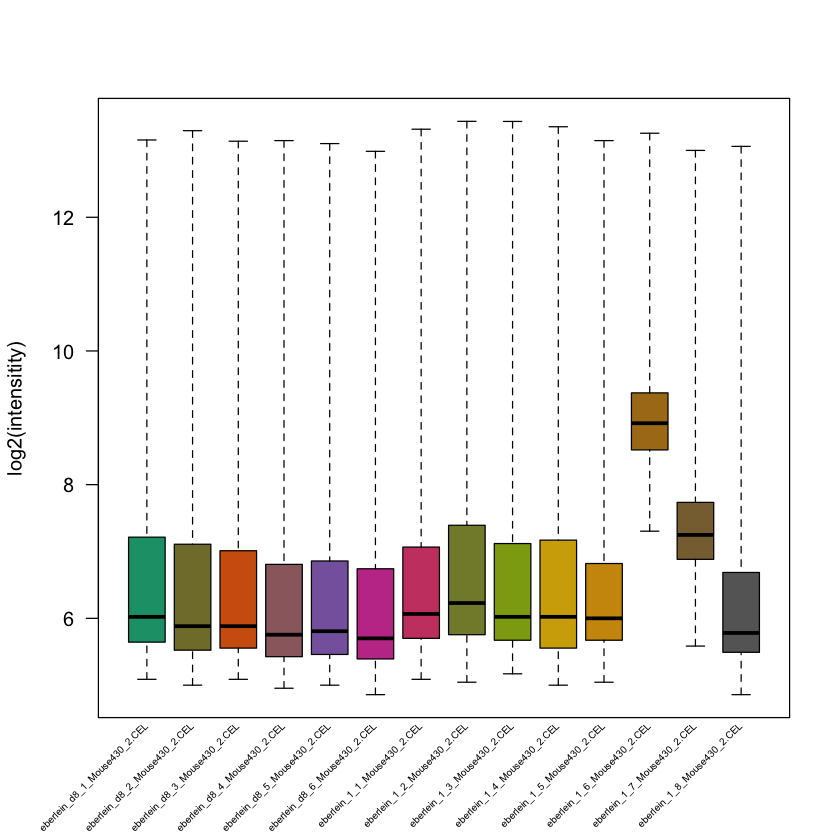

In [8]:
oligo::boxplot(raw_data, 
               ylab="log2(intensitity)",
               xlab=element_blank(),
               las=2,
               main=element_blank(),
               xaxt="n")
end_point = 0.5 + nrow(Biobase::pData(raw_data))
text(seq(1,end_point,by=1), par("usr")[3]-0.1, 
     srt = 45, adj= 1, xpd = TRUE,
     labels = paste(rownames(Biobase::pData(raw_data))), cex=0.5)

## Background normalization

In [9]:
cel_norm <- oligo::rma(raw_data)

Background correcting
Normalizing
Calculating Expression


## PCA plot

In [10]:
exp_cel <- Biobase::exprs(cel_norm)
PCA <- prcomp(t(exp_cel), scale = FALSE)
PCA$x

PC1       PC2         PC3       PC4       
eberlein_d8_1_Mouse430_2.CEL -81.09158   -9.530479  35.85827   5.559815
eberlein_d8_2_Mouse430_2.CEL -80.77614  -10.488784  37.00911  17.511213
eberlein_d8_3_Mouse430_2.CEL -78.28746  -16.741183  51.85344  22.471358
eberlein_d8_4_Mouse430_2.CEL  48.10118   59.292983  26.06567 -16.899187
eberlein_d8_5_Mouse430_2.CEL  53.41011   61.684509  20.80864 -17.899093
eberlein_d8_6_Mouse430_2.CEL  33.02948   57.270800  21.84656 -26.029650
eberlein_1_1_Mouse430_2.CEL  -75.47405  -21.237259 -38.31373  -7.772943
eberlein_1_2_Mouse430_2.CEL  -79.64184  -15.574125 -44.90470 -12.220549
eberlein_1_3_Mouse430_2.CEL  -79.98321  -19.757980 -19.73325  -1.409572
eberlein_1_4_Mouse430_2.CEL  -72.56155  -22.696371 -31.01310 -16.896950
eberlein_1_5_Mouse430_2.CEL   69.28277   46.439308 -34.00635  49.960842
eberlein_1_6_Mouse430_2.CEL  155.87116 -138.640919  16.39865  -5.881581
eberlein_1_7_Mouse430_2.CEL  113.43308  -22.862586 -12.89446   2.575303
eberlein_1_8_Mouse430_2.CEL   74.68806   52.842086 -28.97476   6.930993
                             PC5        PC6         PC7        PC8       
eberlein_d8_1_Mouse430_2.CEL  -8.910552   3.7084440 -30.527087   4.385424
eberlein_d8_2_Mouse430_2.CEL  -1.243292  -1.7107109   3.360176  -1.278047
eberlein_d8_3_Mouse430_2.CEL  -4.270587   0.1310397  11.013166 -10.598255
eberlein_d8_4_Mouse430_2.CEL   4.195842 -13.7475356   7.173062  13.361450
eberlein_d8_5_Mouse430_2.CEL   5.534334  -4.8760474   5.236079   7.564366
eberlein_d8_6_Mouse430_2.CEL  10.277559  25.8251077  -1.286148  -7.336764
eberlein_1_1_Mouse430_2.CEL    8.151220  26.8369558  12.908966 -10.640627
eberlein_1_2_Mouse430_2.CEL    3.280901   1.7020466 -12.711493   8.352032
eberlein_1_3_Mouse430_2.CEL    1.028437 -19.9938129  22.633678   1.422408
eberlein_1_4_Mouse430_2.CEL   -4.168261 -13.8204284  -7.978389   7.021779
eberlein_1_5_Mouse430_2.CEL   18.494709   8.3668879  -1.313175  14.826549
eberlein_1_6_Mouse430_2.CEL   22.538686  -3.1198979  -3.000141  -1.209986
eberlein_1_7_Mouse430_2.CEL  -52.428772  10.3737306   6.175723   5.090503
eberlein_1_8_Mouse430_2.CEL   -2.480224 -19.6757791 -11.684420 -30.960832
                             PC9         PC10        PC11        PC12       
eberlein_d8_1_Mouse430_2.CEL  -3.2321424   1.2638393  -3.6769695  -9.8545779
eberlein_d8_2_Mouse430_2.CEL -18.5681389 -14.5736144   3.4562676   1.0714498
eberlein_d8_3_Mouse430_2.CEL  16.3032370  13.8227340   0.7910958   9.4803008
eberlein_d8_4_Mouse430_2.CEL  -1.2795336   9.4450977 -18.3026415  -6.1958805
eberlein_d8_5_Mouse430_2.CEL -11.1704219   8.3514190  19.0929323   6.3396519
eberlein_d8_6_Mouse430_2.CEL  13.1776622 -17.0268414  -0.7451621   1.1034237
eberlein_1_1_Mouse430_2.CEL  -10.4602931  13.1808068  -1.6339466 -10.1315394
eberlein_1_2_Mouse430_2.CEL   -2.7074466   1.0975577  -7.6570173  22.2614491
eberlein_1_3_Mouse430_2.CEL    2.4697773 -14.4031093  -3.8822817  -3.0958028
eberlein_1_4_Mouse430_2.CEL   14.4820478   1.6058153  13.5580546  -9.9169181
eberlein_1_5_Mouse430_2.CEL    5.0036821  -1.5168899   1.6908775  -2.3982763
eberlein_1_6_Mouse430_2.CEL   -0.6639699  -0.2591481  -0.3621484   0.2312267
eberlein_1_7_Mouse430_2.CEL   -0.3117103  -1.6663008  -0.4756651   1.0639028
eberlein_1_8_Mouse430_2.CEL   -3.0427498   0.6786341  -1.8533955   0.0415903
                             PC13        PC14         
eberlein_d8_1_Mouse430_2.CEL  13.2521443  1.351402e-13
eberlein_d8_2_Mouse430_2.CEL -15.1268640 -6.603662e-13
eberlein_d8_3_Mouse430_2.CEL  -0.3980543  2.598733e-13
eberlein_d8_4_Mouse430_2.CEL  -7.9439097  3.804827e-14
eberlein_d8_5_Mouse430_2.CEL   8.9298953  3.722609e-14
eberlein_d8_6_Mouse430_2.CEL  -0.6629287  1.335824e-13
eberlein_1_1_Mouse430_2.CEL    0.1071298 -2.001578e-14
eberlein_1_2_Mouse430_2.CEL   -1.1717593  2.545470e-13
eberlein_1_3_Mouse430_2.CEL   15.4221021 -5.520803e-13
eberlein_1_4_Mouse430_2.CEL  -12.2358701  6.822068e-13
eberlein_1_5_Mouse430_2.CEL    0.3533745  1.492908e-13
eberlein_1_6_Mouse430_2.

In [14]:
percentVar <- round(100*PCA$sdev^2/sum(PCA$sdev^2),1)
sd_ratio <- sqrt(percentVar[2] / percentVar[1])

dataGG <- data.frame(PC1 = PCA$x[,1], PC2 = PCA$x[,2],
                    Day_post_infection = 
                     as.factor(Biobase::pData(cel_norm)$day_post_infection),
                    Treatment=Biobase::pData(cel_norm)$treatment)

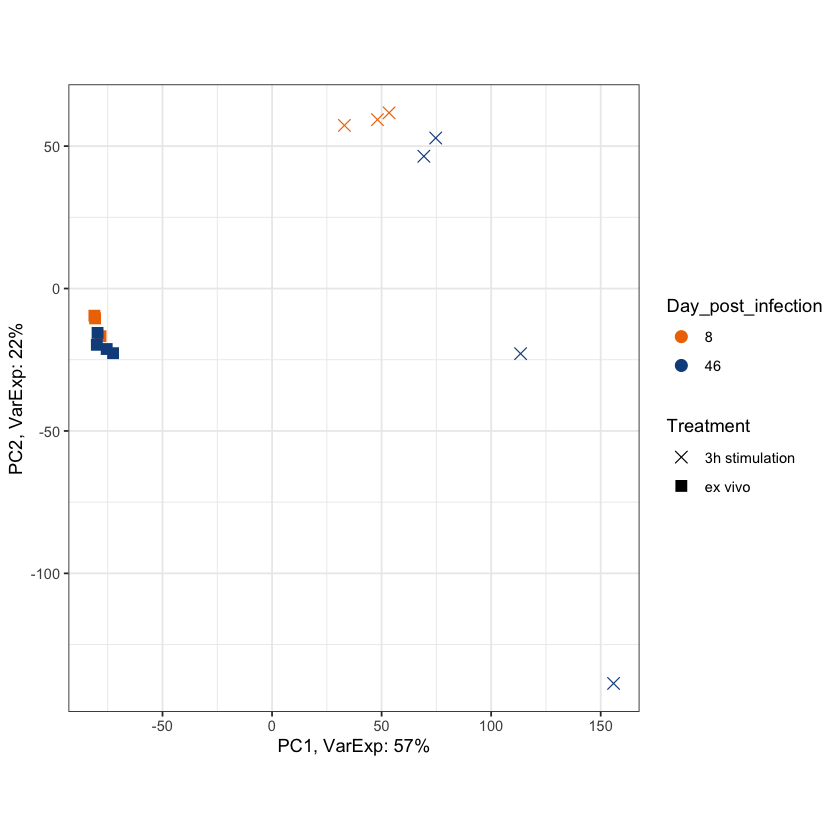

In [16]:
ggplot(dataGG, aes(PC1, PC2)) +
    geom_point(aes(colour = Day_post_infection, shape = Treatment), size=3) +
    xlab(paste0("PC1, VarExp: ", percentVar[1], "%")) +
    ylab(paste0("PC2, VarExp: ", percentVar[2], "%")) +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme_bw()+
    coord_fixed(ratio = 1.3) +
    scale_shape_manual(values = c(4,15)) +
    scale_color_manual(values = c("darkorange2", "dodgerblue4"))

## tSNE plot

In [17]:
tsne <- Rtsne(PCA$x, dims = 3, perplexity=2, verbose=TRUE, max_iter = 500)

Performing PCA
Read the 14 x 14 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 3, perplexity = 2.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.00 seconds (sparsity = 0.479592)!
Learning embedding...
Iteration 50: error is 56.875213 (50 iterations in 0.00 seconds)
Iteration 100: error is 47.627116 (50 iterations in 0.00 seconds)
Iteration 150: error is 43.654227 (50 iterations in 0.00 seconds)
Iteration 200: error is 47.351131 (50 iterations in 0.00 seconds)
Iteration 250: error is 64.943547 (50 iterations in 0.00 seconds)
Iteration 300: error is 0.716210 (50 iterations in 0.00 seconds)
Iteration 350: error is 0.172073 (50 iterations in 0.00 seconds)
Iteration 400: error is 0.039095 (50 iterations in 0.00 seconds)
Iteration 450: error is 0.061326 (50 iterations in 0.00 seconds)
Iteration 500: error is 0.035939 (50 iterations in 0.00 seconds)
Fitting performed in 0.01 seconds.


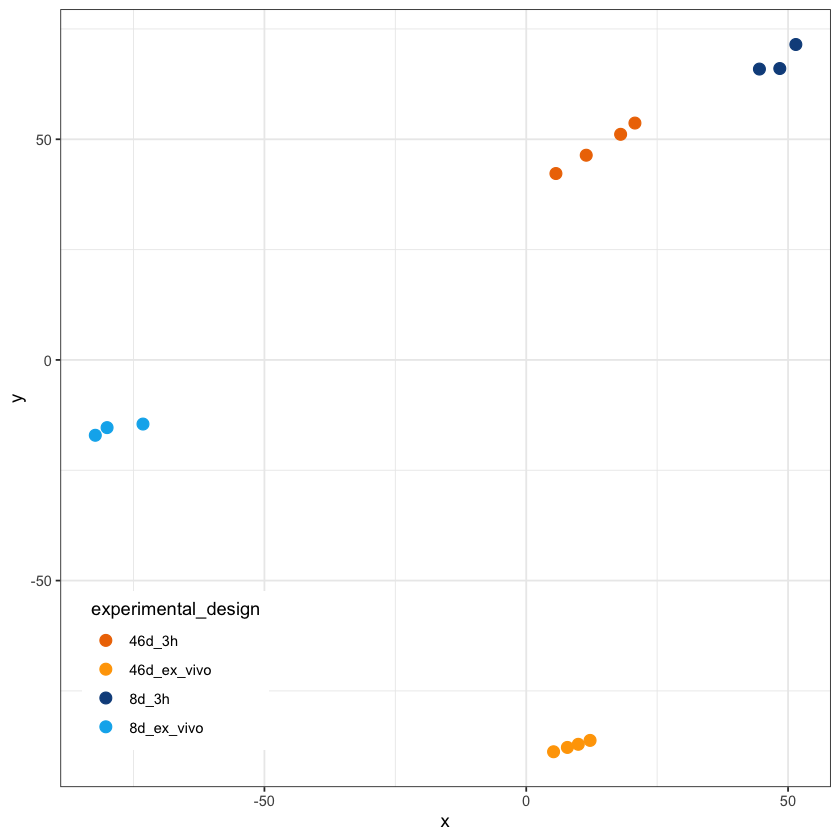

In [20]:
experimental_design <- c(rep("8d_ex_vivo", 3), rep("8d_3h", 3), rep("46d_ex_vivo", 4), rep("46d_3h", 4))
tsne_plot <- data.frame(x = tsne$Y[,1], y = tsne$Y[,2], sample=experimental_design)
ggplot(tsne_plot) + geom_point(aes(x=x, y=y, color=experimental_design), size=3) +
    theme_bw() +
    theme(legend.position = c(0.15, 0.15)) + 
    scale_color_manual(values = c("darkorange2", "orange1", "dodgerblue4", "deepskyblue2"))

## Intensity-based filtering

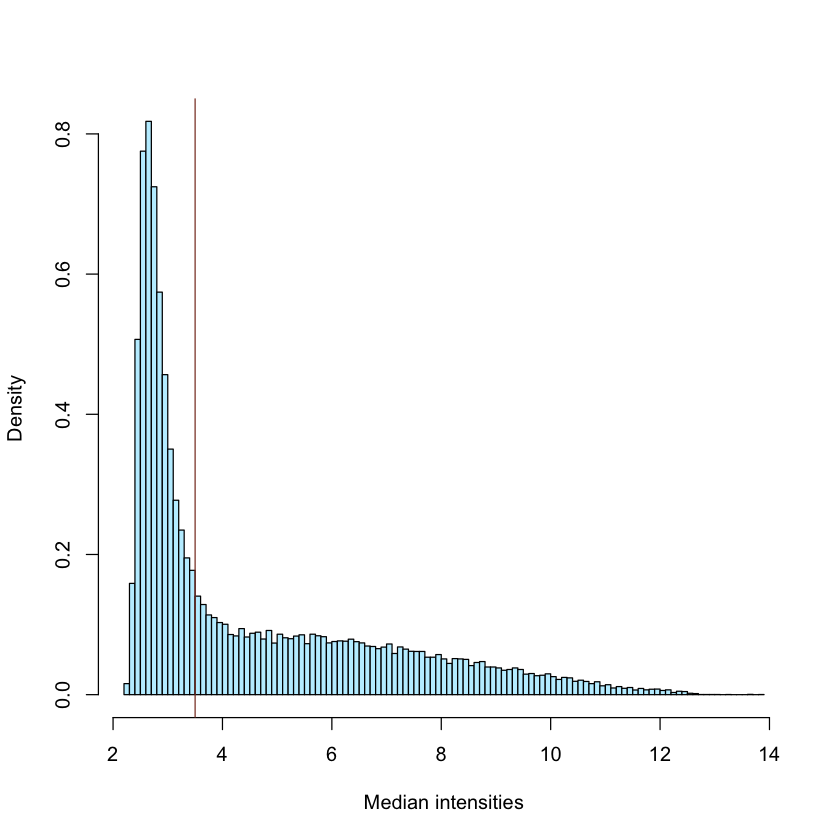

In [48]:
man_threshold <- 3.5
hist_res <- hist(cel_medians, 100, col = "lightblue1", freq = FALSE, 
            main = element_blank(),
            xlab = "Median intensities")

abline(v = man_threshold, col = "coral4", lwd = 1)

In [49]:
no_of_samples <- table(paste0(pData(cel_norm)$treatment, "_" ,pData(cel_norm)$day_post_infection))
no_of_samples 


3h stimulation_46  3h stimulation_8        ex vivo_46         ex vivo_8 
                4                 3                 4                 3 

In [53]:
samples_cutoff <- min(no_of_samples)
idx_threshold <- apply(Biobase::exprs(cel_norm), 1,
                           function(x){
                          sum(x > man_threshold) >= samples_cutoff})
table(idx_threshold)
cel_filtered <- subset(cel_norm, idx_threshold)

idx_threshold
FALSE  TRUE 
20995 24106 

## Annotation

In [84]:
anno_cel <- AnnotationDbi::select(mouse4302.db,
                                  keys = (featureNames(cel_filtered)),
                                  columns = c("SYMBOL", "GENENAME"),
                                  keytype = "PROBEID")
anno_cel <- subset(anno_cel, !is.na(SYMBOL))
anno_grouped <- group_by(anno_cel, PROBEID)
anno_summarized <- dplyr::summarize(anno_grouped, no_of_matches = n_distinct(SYMBOL))
anno_filtered <- filter(anno_summarized, no_of_matches > 1)
probe_stats <- anno_filtered
dim(probe_stats)

'select()' returned 1:many mapping between keys and columns


[1] 845   2

In [98]:
ids_to_exlude <- (featureNames(cel_filtered) %in% probe_stats$PROBEID)
table(ids_to_exlude)

ids_to_exlude
FALSE  TRUE 
23261   845 

In [99]:
cel_final <- subset(cel_filtered, !ids_to_exlude)

In [100]:
fData(cel_final)$PROBEID <- rownames(fData(cel_final))
fData(cel_final) <- left_join(fData(cel_final), anno_cel)
rownames(fData(cel_final)) <- fData(cel_final)$PROBEID

Joining, by = "PROBEID"


## Heatmap of 100 most variable genes

Split expression table to the expression values table and the gene name vector

In [798]:
heat_cel <- as.data.frame(cbind(fData(cel_final), as.matrix(cel_final)))
heat_cel <- na.omit(heat_cel[,!names(heat_cel) %in% c("PROBEID", "GENENAME")])

Remove duplicates Select  probesets with highest average expression 

In [807]:
heat_cel <- heat_cel[order(rowMeans(heat_cel[,-1]), decreasing = TRUE),]
dup_genes <- duplicated(heat_cel$SYMBOL)
heat_cel.unique <- heat_cel[!dup_genes,]

Take top 100 most variable genes

In [902]:
# Order probes by variance
top_var_genes <- head(order(rowVars(heat_cel.unique[,-1]), decreasing = TRUE), 50)
heat_cel.unique_100 <- heat_cel.unique[top_var_genes, ]
# Subtract means
heat_cel.unique_100[,-1] <- heat_cel.unique_100[,-1] - rowMeans(heat_cel.unique_100[,-1])
rownames(heat_cel.unique_100) <- heat_cel.unique_100$SYMBOL
heat_cel.unique_100 <- heat_cel.unique_100[,!names(heat_cel) %in% c("SYMBOL")]

Annotate samples

In [913]:
day_post_infection <- Biobase::pData(cel_final)$day_post_infection
day_post_infection <- ifelse(day_post_infection == "8", "d8", "d46")

treatment <- str_replace_all(Biobase::pData(cel_final)$treatment, " ", "_")
treatment <- ifelse(treatment == "ex_vivo", "ev", "h3")

ann_column <- cbind.data.frame(day_post_infection, treatment)
rownames(ann_column) <- colnames(heat_cel.unique_100)
ann_colors <- list(day_post_infection = c(d8 = "#b4e7ce", d46 = "#59a96a"), treatment = c(h3 = "#87bcde", ev = "#f2f3ae"))

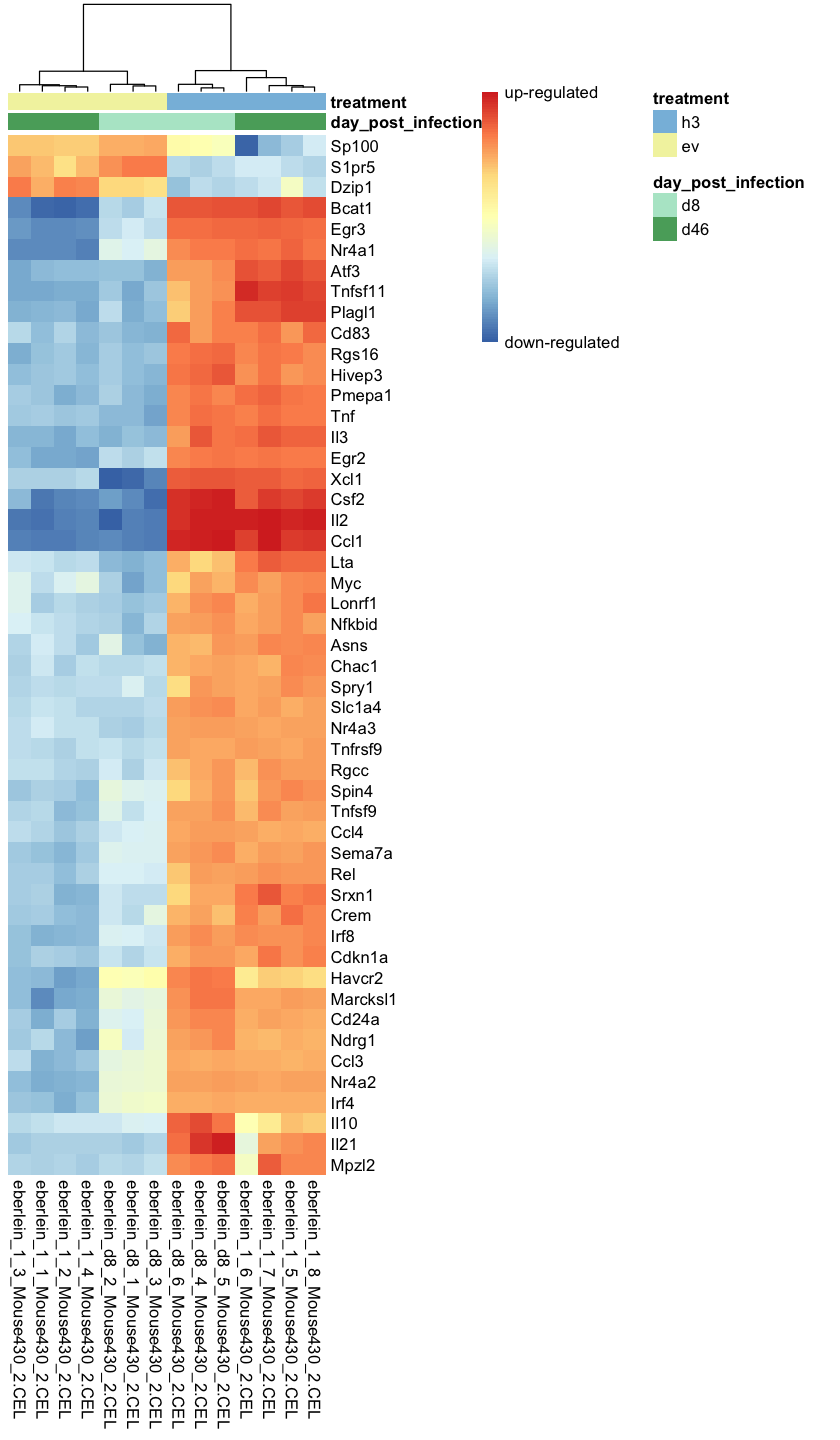

In [914]:
options(repr.plot.width = 7, repr.plot.height = 12)
pheatmap(heat_cel.unique_100,
         annotation_col=ann_column,
         annotation_colors=ann_colors,
         treeheight_row = 0,
         border_color = NA,
         legend_breaks = c(min(heat_cel.unique_100), max(heat_cel.unique_100)),
         legend_labels = (c("down-regulated", "up-regulated")))

## DE analysis using `limma`

(Manually) Describe experimental design and save it in design matrices

In [165]:
sample <- str_replace_all(as.character(Biobase::pData(cel_final)$file), ".CEL", "")

In [216]:
i_8d <- sample[day_post_infection == "d8"]
design_cel_8d <- model.matrix(~ 0 + treatment[day_post_infection == "d8"])
colnames(design_cel_8d)[1:2] <- c("ev", "h3")
rownames(design_cel_8d) <- i_8d 

i_46d <- sample[day_post_infection == "d46"]
design_cel_46d <- model.matrix(~ 0 + treatment[day_post_infection == "d46"])
colnames(design_cel_46d)[1:2] <- c("ev", "h3")
rownames(design_cel_46d) <- i_46d 

[GeneChip® Mouse Expression Set 430 FAQ](https://www.affymetrix.com/support/help/faqs/mouse_430/faq_8.affx) describes how and why in Affymetrix microarrays each gene is referenced by multiple probes. However, Affymetrix does not describe a proper way to interpret ambiguity in probe-gene relation. Thus exist various 'schools' of discarding/merging probes related to the same gene name - use most significant probes, probes with the highest variability, probes with the highest expression. Some approaches advise to BLAST probe sequences and discard the ones that match up with sense strand or introns or genomic regions that do not correspond to any cDNA We'll use probes with the highest expression.

### 8 days

#### Creating contrast matrix

In [261]:
contrast_matrix_8d <- makeContrasts(ev-x3h, levels = design_cel_8d)

#### Apply `limma`

In [261]:
cel_fit_8d <- eBayes(contrasts.fit(lmFit(cel_final[,day_post_infection == "8d"],
                                design = design_cel_8d),
                                contrast_matrix_8d))

#### Select probesets with highest average expression for differential gene

In [261]:
o_8d <- order(cel_fit_8d$Amean, decreasing=TRUE)
dup_8d <- duplicated(cel_fit_8d$genes$SYMBOL[o_8d])
cel_fit_8d.unique <- cel_fit_8d[o_8d,][!dup_8d,]

#### Write results to a `.tsv` file

In [262]:
table_8d <- topTable(cel_fit_8d.unique, number = Inf)
write.table(table_8d[order(table_8d$P.Value),], file="../8_days_ex_vivo_vs_3h_stimulation.tsv", sep="\t", row.names=FALSE)

### 46 days

#### Creating contrast matrix

In [ ]:
contrast_matrix_46d <- makeContrasts(ev-x3h, levels = make.names(colnames(design_cel_46d)))

#### Apply `limma`

In [ ]:
cel_fit_46d <- eBayes(contrasts.fit(lmFit(cel_final[,day_post_infection == "46d"],
                                design = design_cel_46d),
                                contrast_matrix_46d))

#### Select probesets with highest average expression for differential gene

In [ ]:
o_46d <- order(cel_fit_8d$Amean, decreasing=TRUE)
dup_46d <- duplicated(cel_fit_46d$genes$SYMBOL[o_46d])
cel_fit_46d.unique <- cel_fit_46d[o_46d,][!dup_46d,]

#### Write results to a `.tsv` file

In [263]:
table_46d <- topTable(cel_fit_46d.unique, number = Inf)
write.table(table_46d[order(table_46d$P.Value),], file="../46_days_ex_vivo_vs_3h_stimulation.tsv", sep="\t", row.names=FALSE)

## Volcano plot of differentially expressed genes

In [ ]:
nrow(subset(table_8d, abs(logFC) > 2 & adj.P.Val < 0.1))
nrow(subset(table_46d, abs(logFC) > 2 & adj.P.Val < 0.1))

### 8 days

In [ ]:
vol_table <- subset(na.omit(table_8d), P.Value < 0.05)[c("SYMBOL", "logFC", "P.Value", "adj.P.Val")]
dim(vol_table)

In [ ]:
vol_table["group"] <- "NotSignificant"
vol_table[which(vol_table["adj.P.Val"] < 0.05 & abs(vol_table["logFC"]) < 2 ),"group"] <- "Significant"

# change the grouping for the entries a large enough logFC change but not a low enough p value
vol_table[which(vol_table["adj.P.Val"] > 0.05 & abs(vol_table["logFC"]) > 2),"group"] <- "logFC"

# change the grouping for the entries with both significance and large enough logfC change
vol_table[which(vol_table["adj.P.Val"] < 0.05 & abs(vol_table["logFC"]) > 2),"group"] <- "Significant & logFC"

In [ ]:
peaks <- vol_table[with(vol_table, order(logFC, adj.P.Val)),][1:10,]
peaks <- rbind(peaks, vol_table[with(vol_table, order(-logFC, adj.P.Val)),][1:10,])
a <- list()
for (i in seq_len(nrow(peaks))) {
  m <- peaks[i, ]
  a[[i]] <- list(
    x = m[["logFC"]],
    y = -log10(m[["adj.P.Val"]]),
    text = m[["SYMBOL"]],
    xref = "x",
    yref = "y",
    showarrow = FALSE
  )
}

In [ ]:
p <- plot_ly(data = vol_table, x = ~logFC, y = ~-log10(adj.P.Val), text = ~SYMBOL, mode = "markers", color = ~group, type="scatter") %>% 
  layout(title ="Volcano Plot") %>%
  layout(annotations = a)
p

### 46 days

In [306]:
vol_table <- subset(na.omit(table_46d), P.Value < 0.05)[c("SYMBOL", "logFC", "P.Value", "adj.P.Val")]
dim(vol_table)

[1] 6263    4

In [307]:
vol_table["group"] <- "NotSignificant"
vol_table[which(vol_table["adj.P.Val"] < 0.05 & abs(vol_table["logFC"]) < 2),"group"] <- "Significant"

# change the grouping for the entries a large enough logFC change but not a low enough p value
vol_table[which(vol_table["adj.P.Val"] > 0.05 & abs(vol_table["logFC"]) > 2),"group"] <- "logFC"

# change the grouping for the entries with both significance and large enough logfC change
vol_table[which(vol_table["adj.P.Val"] < 0.05 & abs(vol_table["logFC"]) > 2),"group"] <- "Significant & logFC"

In [308]:
peaks <- vol_table[with(vol_table, order(logFC, adj.P.Val)),][1:10,]
peaks <- rbind(peaks, vol_table[with(vol_table, order(-logFC, adj.P.Val)),][1:10,])
a <- list()
for (i in seq_len(nrow(peaks))) {
  m <- peaks[i, ]
  a[[i]] <- list(
    x = m[["logFC"]],
    y = -log10(m[["adj.P.Val"]]),
    text = m[["SYMBOL"]],
    xref = "x",
    yref = "y",
    showarrow = FALSE
  )
}

In [309]:
p <- plot_ly(data = vol_table, x = ~logFC, y = ~-log10(adj.P.Val), text = ~SYMBOL, mode = "markers", color = ~group, type="scatter") %>% 
  layout(title ="Volcano Plot") %>%
  layout(annotations = a)
p

HTML widgets cannot be represented in plain text (need html)

## Enrichment analysis

In [321]:
dbs <- c("WikiPathways_2019_Mouse", "KEGG_2019_Mouse", "GO_Molecular_Function_2018", "GO_Cellular_Component_2018", "GO_Biological_Process_2018", "Mouse_Gene_Atlas")

### 8 day upregulated

In [915]:
DE_genes_8d_up <- subset(table_8d, adj.P.Val < 0.1 & logFC > 2)$SYMBOL
enriched_8d_up <- enrichr(DE_genes_8d_up, dbs)

Uploading data to Enrichr... Done.
  Querying WikiPathways_2019_Mouse... Done.
  Querying KEGG_2019_Mouse... Done.
  Querying GO_Molecular_Function_2018... Done.
  Querying GO_Cellular_Component_2018... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying Mouse_Gene_Atlas... Done.
Parsing results... Done.


In [916]:
head(subset(enriched_8d_up[["WikiPathways_2019_Mouse"]], select=-c(5,6)), 10)

Term                                                                                 
1  Apoptosis WP1254                                                                     
2  Cytokines and Inflammatory Response WP222                                            
3  EDA Signalling in Hair Follicle Development WP3652                                   
4  Id Signaling Pathway WP512                                                           
5  TNF-alpha NF-kB Signaling Pathway WP246                                              
6  MAPK signaling pathway WP493                                                         
7  Lung fibrosis WP3632                                                                 
8  IL-3 Signaling Pathway WP373                                                         
9  Factors and pathways affecting insulin-like growth factor (IGF1)-Akt signaling WP3675
10 MicroRNAs in Cardiomyocyte Hypertrophy WP1560                                        
   Overlap P.value      Adjusted.P.value Odds.Ratio Combined.Score
1  12/81   1.226297e-08 2.158283e-06      8.689041  158.28549     
2  6/27    5.142370e-06 4.525286e-04     13.033561  158.72266     
3  4/18    2.102910e-04 1.233707e-02     13.033561  110.35540     
4  6/51    2.217965e-04 9.759045e-03      6.900121   58.05589     
5  11/187  3.807214e-04 1.340139e-02      3.450060   27.16385     
6  10/159  4.119029e-04 1.208248e-02      3.688744   28.75274     
7  6/61    5.929388e-04 1.490818e-02      5.768953   42.86574     
8  7/100   1.625612e-03 3.576346e-02      4.105572   26.36545     
9  4/31    1.816087e-03 3.551459e-02      7.567874   47.76139     
10 6/82    2.775676e-03 4.885190e-02      4.291539   25.26369     
   Genes                                                                 
1  BCL2L11;FASL;IRF4;MYC;CASP4;LTA;TNF;TNFRSF21;NFKB1;IGF1R;NFKBIB;BCL2L1
2  IL10;IL3;CSF2;TGFB1;TNF;IL2                                           
3  REL;NFKB1;RELB;NFKB2                                                  
4  TGIF1;FLT1;CD40LG;ATF3;NFKB1;IGF1R                                    
5  FBL;POLR1A;POLR1B;BCL3;REL;MAP3K8;TNF;NFKB1;NFKB2;NFKBIB;RELB         
6  DUSP4;NR4A1;TGFB1;FASL;MYC;IL1R2;MAPKAPK2;MAP3K8;TNF;NFKB1            
7  CSF2;TGFB1;CCL4;CCL3;MT2;TNF                                          
8  IL3;BCL2L11;CISH;FES;MAPKAPK2;NFKB1;BCL2L1                            
9  TNFSF9;TNF;NFKB1;IGF1R                                                
10 MAP2K3;TGFB1;CISH;TNF;NFKB1;IGF1R

In [917]:
head(subset(enriched_8d_up[["KEGG_2019_Mouse"]], select=-c(5,6)), 10)

Term                                      Overlap P.value     
1  Cytokine-cytokine receptor interaction    26/292  6.755852e-12
2  C-type lectin receptor signaling pathway  12/112  4.775174e-07
3  Ribosome biogenesis in eukaryotes         12/115  6.369117e-07
4  NF-kappa B signaling pathway              11/102  1.346992e-06
5  Transcriptional misregulation in cancer   14/183  3.269790e-06
6  MAPK signaling pathway                    18/294  3.313465e-06
7  Human T-cell leukemia virus 1 infection   15/245  2.179463e-05
8  Glycine, serine and threonine metabolism  6/40    5.532855e-05
9  T cell receptor signaling pathway         9/101   5.773570e-05
10 Chagas disease (American trypanosomiasis) 9/103   6.735123e-05
   Adjusted.P.value Odds.Ratio Combined.Score
1  2.047023e-09     5.222352   134.32208     
2  7.234388e-05     6.284039    91.46208     
3  6.432808e-05     6.120107    87.31333     
4  1.020346e-04     6.325111    85.50055     
5  1.981493e-04     4.486964    56.67387     
6  1.673300e-04     3.590879    45.30798     
7  9.433962e-04     3.590879    38.54395     
8  2.095569e-03     8.797654    86.23655     
9  1.943769e-03     5.226329    51.00706     
10 2.040742e-03     5.124847    49.22718     
   Genes                                                                                                                                                   
1  IL21;CSF2;TNF;IL1RL1;CCL9;CCL4;CCL3;TNFSF11;CCL1;TNFRSF4;IL10;TGFB1;TNFSF14;CD70;IL1R2;TNFRSF9;IL2;IL3;CD40LG;FASL;IL2RA;LTA;TNFSF9;XCL1;TNFSF8;TNFRSF21
2  IL10;PLK3;EGR2;EGR3;KSR1;MAPKAPK2;BCL3;TNF;NFKB1;IL2;NFKB2;RELB                                                                                         
3  RCL1;FBL;NOP58;POP1;HEATR1;WDR75;MPHOSPH10;PWP2;GNL2;GTPBP4;MDN1;GNL3                                                                                   
4  CD40LG;GADD45B;TNFSF14;CCL4;LTA;TNFSF11;TNF;NFKB1;NFKB2;BCL2L1;RELB                                                                                     
5  CDKN1A;CSF2;FLT1;GADD45B;IL1R2;DOT1L;NFKB1;IGF1R;PER2;IL3;NR4A3;MYC;REL;BCL2L1                                                                          
6  DUSP4;MAP2K3;TGFB1;FLT1;GADD45B;AREG;TNF;DUSP16;NFKB1;RELB;IGF1R;NFKB2;NR4A1;FASL;MAPKAPK3;MYC;MAPKAPK2;MAP3K8                                          
7  EGR2;CDKN1A;CSF2;TGFB1;IL1R2;TNF;NFKB1;IL2;RELB;NFKB2;FOSL1;MYC;IL2RA;LTA;BCL2L1                                                                        
8  GCSH;SRR;GLDC;SHMT2;SHMT1;PHGDH                                                                                                                         
9  IL10;CSF2;CD40LG;MAP3K8;PDCD1;TNF;NFKB1;IL2;NFKBIB                                                                                                      
10 IL10;TGFB1;FASL;PPP2R2C;GNAQ;CCL3;TNF;NFKB1;IL2

In [918]:
head(subset(enriched_8d_up[["GO_Molecular_Function_2018"]], select=-c(5,6)), 10)

Term                                                                                                                        
1  RNA binding (GO:0003723)                                                                                                    
2  transcriptional activator activity, RNA polymerase II transcription regulatory region sequence-specific binding (GO:0001228)
3  transcription factor activity, RNA polymerase II core promoter proximal region sequence-specific binding (GO:0000982)       
4  RNA polymerase II regulatory region sequence-specific DNA binding (GO:0000977)                                              
5  transcriptional activator activity, RNA polymerase II core promoter proximal region sequence-specific binding (GO:0001077)  
6  snoRNA binding (GO:0030515)                                                                                                 
7  RNA polymerase II core promoter proximal region sequence-specific DNA binding (GO:0000978)                                  
8  core promoter proximal region sequence-specific DNA binding (GO:0000987)                                                    
9  transcription corepressor activity (GO:0003714)                                                                             
10 cytokine activity (GO:0005125)                                                                                              
   Overlap P.value      Adjusted.P.value Odds.Ratio Combined.Score
1  55/1388 3.763636e-09 4.331945e-06      2.324068   45.08199     
2  20/285  1.071341e-07 6.165567e-05      4.115862   66.05622     
3  19/281  3.967479e-07 1.522189e-04      3.965728   58.45469     
4  24/461  1.425729e-06 4.102534e-04      3.053416   41.10150     
5  13/176  1.072493e-05 2.468878e-03      4.332178   49.57285     
6  6/31    1.207616e-05 2.316610e-03     11.351812  128.55106     
7  16/263  1.259033e-05 2.070211e-03      3.568123   40.25764     
8  16/279  2.603959e-05 3.746446e-03      3.363500   35.50474     
9  13/204  5.087061e-05 6.505786e-03      3.737565   36.95041     
10 11/156  7.776407e-05 8.950644e-03      4.135649   39.13081     
   Genes                                                                                                                                                                                                                                                                                                                                  
1  CARS;TFRC;POP1;PPAN;GPATCH4;PWP2;RRP9;DUSP14;FBL;NKRF;C1QBP;ZC3H12A;RBPMS2;CLUH;DIMT1;NSUN2;WDR75;URB1;GNL2;PPRC1;PUS7;GTPBP4;GNL3;FTSJ3;GRWD1;MRTO4;FSCN1;CCDC86;GEMIN5;NAF1;RPS19BP1;HEATR1;NOP2;NOLC1;NOC4L;DHX33;PDCD11;NOCT;DHX37;UTP20;IGF2BP3;LYAR;YARS;NOP14;NOP58;NOP16;NIFK;RCC2;NOC3L;MYBBP1A;XPOT;APEX1;MPHOSPH10;TSR1;ESF1
2  NFAT5;EGR2;HLF;CREM;RBPJ;GRHL1;NFKB1;FOSL2;NFKB2;NR4A2;NR4A1;PLSCR1;NR4A3;NKRF;IRF4;MYC;PLAGL1;MAFF;REL;ATF3                                                                                                                                                                                                                           
3  TGIF1;NFAT5;EGR2;HLF;RBPJ;GRHL1;FOSL2;NFKB2;FOSL1;NR4A2;NR4A1;PLSCR1;NR4A3;NFIL3;NKRF;IRF4;MYC;IRF8;ATF3                                                                                                                                                                                                                               
4  TGIF1;NFAT5;EGR2;HLF;CREM;RBPJ;GRHL1;NFKB1;FOSL2;RELB;NFKB2;FOSL1;NR4A2;NR4A1;NR4A3;NFIL3;NKRF;IRF4;MYC;PLAGL1;POU2AF1;REL;IRF8;ATF3                                                                                                                                                                                                   
5  NFAT5;EGR2;HLF;RBPJ;GRHL1;NFKB2;NR4A2;NR4A1;PLSCR1;NR4A3;NKRF;IRF4;MYC                                                                                                                                  

In [919]:
head(subset(enriched_8d_up[["GO_Cellular_Component_2018"]], select=-c(5,6)), 10)

Term                                                   Overlap P.value     
1  nucleolus (GO:0005730)                                 53/677  1.044898e-20
2  preribosome (GO:0030684)                               16/76   1.540332e-13
3  small-subunit processome (GO:0032040)                  10/36   3.121317e-10
4  small nucleolar ribonucleoprotein complex (GO:0005732) 5/12    1.004400e-06
5  preribosome, small subunit precursor (GO:0030688)      4/10    1.607789e-05
6  nucleolar part (GO:0044452)                            11/154  6.920595e-05
7  preribosome, large subunit precursor (GO:0030687)      5/27    8.295636e-05
8  box C/D snoRNP complex (GO:0031428)                    3/6     9.458268e-05
9  90S preribosome (GO:0030686)                           4/16    1.284931e-04
10 fibrillar center (GO:0001650)                          7/132   7.560100e-03
   Adjusted.P.value Odds.Ratio Combined.Score
1  4.660246e-18      4.591587  211.24874     
2  3.434941e-11     12.347585  364.27360     
3  4.640357e-08     16.291952  356.59166     
4  1.119906e-04     24.437928  337.51516     
5  1.434148e-03     23.460411  258.95755     
6  5.144309e-03      4.189359   40.12746     
7  5.285505e-03     10.861301  102.06577     
8  5.272984e-03     29.325513  271.73127     
9  6.367545e-03     14.662757  131.37296     
10 3.371805e-01      3.110282   15.19332     
   Genes                                                                                                                                                                                                                                                                                                                    
1  CDKN1A;POP1;RBPJ;PWP1;RRP9;FBL;NKRF;MYC;PHLDA1;METTL1;DIMT1;NSUN2;WDR75;AEN;URB1;GNL2;GTPBP4;GNL3;FTSJ3;PLSCR1;GRWD1;POLR1B;MRTO4;CCDC86;EEF1E1;ATF3;RPS19BP1;HEATR1;NOP2;NOLC1;NOC4L;TMA16;DHX33;PDCD11;DHX37;BEND3;UTP20;LYAR;MDN1;PLK3;NOP14;NOP58;NOP16;NIFK;MYO10;NOC3L;WDR12;RCL1;RGCC;MYBBP1A;APEX1;MPHOSPH10;TSR1
2  NOP14;NOP58;HEATR1;PPAN;NOC4L;PWP2;WDR12;RRP9;FTSJ3;FBL;PDCD11;TSR1;MPHOSPH10;UTP20;RRP15;MDN1                                                                                                                                                                                                                           
3  FBL;NOP58;NOP14;PDCD11;HEATR1;MPHOSPH10;NOC4L;UTP20;PWP2;RRP9                                                                                                                                                                                                                                                            
4  FBL;NOP58;MPHOSPH10;NAF1;RRP9                                                                                                                                                                                                                                                                                            
5  NOP14;TSR1;NOC4L;UTP20                                                                                                                                                                                                                                                                                                   
6  FBL;NOP58;POP1;POLR1A;POLR1B;HEATR1;NOLC1;TAF4B;URB1;RRP9;RAI14                                                                                                                                                                                                                                                          
7  PPAN;WDR12;RRP15;MDN1;FTSJ3                                                                                                                                                                                                                                                                                              
8  FBL;NOP58;RRP9                                                                           

In [920]:
head(subset(enriched_8d_up[["GO_Biological_Process_2018"]], select=-c(5,6)), 10)

Term                                                                    
1  ribosome biogenesis (GO:0042254)                                        
2  rRNA processing (GO:0006364)                                            
3  rRNA metabolic process (GO:0016072)                                     
4  ncRNA processing (GO:0034470)                                           
5  cytokine-mediated signaling pathway (GO:0019221)                        
6  regulation of transcription from RNA polymerase II promoter (GO:0006357)
7  cellular response to tumor necrosis factor (GO:0071356)                 
8  inflammatory response (GO:0006954)                                      
9  negative regulation of transcription, DNA-templated (GO:0045892)        
10 apoptotic process (GO:0006915)                                          
   Overlap P.value      Adjusted.P.value Odds.Ratio Combined.Score
1  24/227  1.136743e-12 5.800801e-09     6.200990   170.54491     
2  22/203  6.196162e-12 1.580951e-08     6.356269   164.03681     
3  21/201  3.807532e-11 6.476611e-08     6.127719   147.01290     
4  21/228  4.041815e-10 5.156345e-07     5.402068   116.84218     
5  33/634  1.410066e-08 1.439114e-05     3.052814    55.18585     
6  54/1479 8.367711e-08 7.116738e-05     2.141417    34.89717     
7  16/195  2.526549e-07 1.841854e-04     4.812392    73.10621     
8  18/253  3.821747e-07 2.437797e-04     4.172800    61.66309     
9  35/814  5.335013e-07 3.024952e-04     2.521850    36.42511     
10 17/232  5.342580e-07 2.726319e-04     4.297705    62.06911     
   Genes                                                                                                                                                                                                                                                                                                               
1  NOP14;NOP58;NOP16;DIS3;HEATR1;WDR75;NOLC1;NOC4L;PWP2;GNL2;WDR12;RRP9;GNL3;RCL1;FBL;PDCD11;MRTO4;DHX37;MPHOSPH10;TSR1;UTP20;NAF1;LYAR;MDN1                                                                                                                                                                           
2  NOP14;NOP58;DIS3;HEATR1;NOP2;WDR75;NOLC1;NOC4L;PWP2;WDR12;RRP9;RCL1;FBL;PDCD11;MRTO4;DHX37;MPHOSPH10;TSR1;UTP20;LYAR;RRP15;MDN1                                                                                                                                                                                     
3  NOP14;NOP58;NIFK;DIS3;HEATR1;WDR75;NOLC1;NOC4L;PWP2;WDR12;RRP9;RCL1;FBL;PDCD11;MRTO4;DHX37;MPHOSPH10;TSR1;UTP20;LYAR;MDN1                                                                                                                                                                                           
4  NOP14;NOP58;POP1;DIS3;HEATR1;WDR75;NOLC1;NOC4L;PWP2;WDR12;RRP9;RCL1;FBL;PDCD11;MRTO4;DHX37;MPHOSPH10;TSR1;UTP20;LYAR;MDN1                                                                                                                                                                                           
5  IL21;CDKN1A;CSF2;TNF;IL1RL1;MYC;CCL4;CCL3;TNFSF11;MAP3K8;CCL1;TNFRSF4;IL10;TGFB1;TNFSF14;CISH;CD70;IL1R2;TNFRSF9;IL2;NFKB1;IL3;CD40LG;IRF4;IL2RA;FSCN1;LTA;TNFSF9;XCL1;IRF8;TNFSF8;TNFRSF21;BCL2L1                                                                                                                  
6  CSRNP1;SUV39H2;CDKN1A;RBPJ;TNF;NKRF;MYC;C1QBP;ZC3H12A;TNFSF11;TGIF1;ZHX2;TGIF2;TET2;ZBTB32;PPRC1;UTF1;PLSCR1;IRF4;ERF;IRF8;TRIB3;ATF3;NFAT5;HLF;DOT1L;NOP2;CREM;RELB;NFIL3;PLAGL1;BEND3;ZBED5;LYAR;PLK3;EGR2;TGFB1;GRHL1;NFKB1;FOSL2;NFKB2;FOSL1;PER2;NR4A2;NR4A1;NR4A3;RGCC;POU2AF1;MAFF;KLF9;REL;TAF4B;BCOR;NFKBID
7  TNFSF14;CD70;TNFRSF9;TNF;CD40LG;ZC3H12A;CCL4;LTA;CCL3;TNFSF11;TNFSF9;XCL1;TNFSF8;CCL1;TNFRSF4;TNFRSF21                                                                                                                                             

In [921]:
head(subset(enriched_8d_up[["Mouse_Gene_Atlas"]], select=-c(5,6)), 10)

Term                           Overlap P.value      Adjusted.P.value
1  embryonic_stem_line_Bruce4_p13 50/876  5.419386e-14 5.202611e-12    
2  embryonic_stem_line_V26_2_p16  45/728  7.027969e-14 3.373425e-12    
3  mast_cells_IgE+antigen_1hr     22/265  1.112761e-09 3.560835e-08    
4  macrophage_peri_LPS_thio_1hrs  27/598  4.640401e-06 1.113696e-04    
5  macrophage_bone_marrow_2hr_LPS 18/365  6.059422e-05 1.163409e-03    
6  macrophage_bone_marrow_6hr_LPS 26/730  3.480992e-04 5.569587e-03    
7  T-cells_foxP3+                 7/112   3.095380e-03 4.245093e-02    
8  mega_erythrocyte_progenitor    18/562  8.169710e-03 9.803652e-02    
9  Baf3                           15/440  8.898031e-03 9.491233e-02    
10 neuro2a                        14/425  1.482261e-02 1.422971e-01    
   Odds.Ratio Combined.Score
1  3.347661   102.258362    
2  3.625407   109.800136    
3  4.869142   100.384280    
4  2.648123    32.520833    
5  2.892379    28.088796    
6  2.088941    16.634283    
7  3.665689    21.179782    
8  1.878503     9.030567    
9  1.999467     9.441333    
10 1.932034     8.136957    
   Genes                                                                                                                                                                                                                                                                                                       
1  SUV39H2;ZMYND19;POP1;PPAN;GPATCH4;TSEN2;PWP1;RRP9;CHCHD4;C1QBP;RCC1;RRP15;TGIF2;DIS3;NSUN2;WDR75;AEN;URB1;PPRC1;TIMM8A1;UTF1;WDR77;GNL3;FTSJ3;GRWD1;POLR1B;ERF;GEMIN5;NAF1;SMYD5;SHMT1;HEATR1;NOP2;NOLC1;NOC4L;SLC7A3;SRM;PDCD11;UTP20;NOP14;NOP58;MYO10;RCC2;ZBTB10;NOC3L;MYBBP1A;APEX1;MPHOSPH10;TSR1;ESF1
2  SUV39H2;ZMYND19;POP1;GLDC;SMYD5;SHMT1;HEATR1;NOP2;PPAN;NOLC1;NOC4L;PWP1;RRP9;SLC7A3;SRM;CHCHD4;FBL;C1QBP;RBPMS2;BEND3;RCC1;UTP20;PCGF6;NOP58;TGIF2;DIS3;RCC2;NSUN2;WDR75;PPRC1;UTF1;GTPBP4;WDR77;GNL3;FTSJ3;1810032O08RIK;MYBBP1A;POLR1A;GRWD1;APEX1;POLR1B;KLF9;TSR1;TAF4B;NAF1                            
3  PLK3;CDKN1A;EGR3;TNFSF14;GCH1;CISH;C77027;PDCD1LG2;NDRG1;NR4A2;PLSCR1;SPRED1;ARL5B;NR4A3;GFOD1;D8ERTD56E;TNFSF8;CCL1;BCOR;NFKBID;HAVCR2;RAI14                                                                                                                                                               
4  CSRNP1;CD83;SMYD5;DOT1L;ADO;TNF;BCL2L11;RGS1;D2WSU107E;RASGEF1B;CCL4;CCL3;TGIF1;EGR2;4930447I22RIK;GADD45B;NEK6;SLC16A10;RILPL2;MAFF;REL;TNFSF9;NFKBID;ST6GALNAC4;ATF3;CD200;NFKBIB                                                                                                                         
5  IL10;CDKN1A;MARCKSL1;CSF2;GADD45B;SLC16A10;RBPJ;EHD1;CCL9;BCL2L11;XPOT;ZC3H12A;BCL3;CCL4;REL;CCL3;SLC19A1;NFKBIB                                                                                                                                                                                            
6  DUSP16;A630035D09RIK;CCL9;ZC3H12A;LIPG;CASP4;CCL4;CCL3;SLC15A3;SLAMF1;IL10;PPP1R16B;MARCKSL1;TET2;ZBTB10;SLC16A10;FOSL2;EHD1;IL3;NR4A3;PPP2R2C;CPD;MAPKAPK2;BCL3;CCDC86;5830474E16RIK                                                                                                                       
7  PTGER2;IL2RA;TNFSF11;PDCD1;TNFRSF4;IL2;SLAMF1                                                                                                                                                                                                                                                               
8  NOP16;ZMYND19;METTL1;GPATCH4;NOC4L;PWP2;ATAD3A;GTPBP4;FANCF;NKRF;GRWD1;NDUFAF4;DHX37;MPHOSPH10;GEMIN5;POLR3H;TRMT61A;SLC19A1                                                                                                                                                                                
9  TMEM185B;USP31;KSR1;SHMT2;NEK6;ZBTB10;GTPBP4;FANCF;NFIL3;XPOT;MYC;IL2RA;TRIB3;SLC16A8;DUS4L                                                              

### 8 day downregulated

In [922]:
DE_genes_8d_dn <- subset(table_8d, adj.P.Val < 0.1 & logFC < -2)$SYMBOL
enriched_8d_dn <- enrichr(DE_genes_8d_dn, dbs)

Uploading data to Enrichr... Done.
  Querying WikiPathways_2019_Mouse... Done.
  Querying KEGG_2019_Mouse... Done.
  Querying GO_Molecular_Function_2018... Done.
  Querying GO_Cellular_Component_2018... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying Mouse_Gene_Atlas... Done.
Parsing results... Done.


In [923]:
head(subset(enriched_8d_dn[["WikiPathways_2019_Mouse"]], select=-c(5,6)), 10)

Term                                             Overlap P.value     
1  G1 to S cell cycle control WP413                 6/61    0.0004312637
2  Signal Transduction of S1P Receptor WP57         3/22    0.0050306686
3  Fatty acid oxidation WP2318                      2/10    0.0106133021
4  Fatty Acid Beta Oxidation WP1269                 3/34    0.0169742143
5  Mitochondrial LC-Fatty Acid Beta-Oxidation WP401 2/16    0.0265674623
6  Oxidative Damage WP1496                          3/42    0.0296630983
7  Focal Adhesion WP85                              7/185   0.0301181419
8  Small Ligand GPCRs WP353                         2/18    0.0331706340
9  Orphan GPCRs WP1398                              2/19    0.0366872063
10 Notch Signaling Pathway WP29                     3/46    0.0374447904
   Adjusted.P.value Odds.Ratio Combined.Score
1  0.07590241        6.128390  47.487610     
2  0.44269884        8.496177  44.963487     
3  0.62264706       12.461059  56.643578     
4  0.74686543        5.497526  22.408246     
5  0.93517467        7.788162  28.255982     
6  0.87011755        4.450378  15.655770     
7  0.75725614        2.357498   8.257436     
8  0.72975395        6.922811  23.579718     
9  0.71743870        6.558452  21.677830     
10 0.65902831        4.063389  13.347776     
   Genes                                   
1  ORC5;CDKN2D;CCND3;CDKN1B;GADD45A;E2F2   
2  RACGAP1;S1PR1;S1PR5                     
3  CPT1A;HADH                              
4  CPT1A;ACSS2;HADH                        
5  CPT1A;HADH                              
6  CDKN1B;GADD45A;TNK2                     
7  CCND3;TXK;TNK2;SELENOP;FLNA;ITGB7;MAP2K6
8  S1PR1;S1PR4                             
9  GPR155;WLS                              
10 NOTCH3;KAT2B;DTX1

In [924]:
head(subset(enriched_8d_dn[["KEGG_2019_Mouse"]], select=-c(5,6)), 10)

Term                           Overlap P.value      Adjusted.P.value
1  FoxO signaling pathway         10/132  5.465643e-05 0.0165609       
2  Cell cycle                     8/123   8.415050e-04 0.1274880       
3  Lysosome                       7/124   3.907836e-03 0.3946915       
4  Sphingolipid signaling pathway 6/124   1.503572e-02 1.0000000       
5  Glycerolipid metabolism        4/61    1.660068e-02 1.0000000       
6  Influenza A                    7/168   1.900148e-02 0.9595747       
7  Bladder cancer                 3/41    2.786646e-02 1.0000000       
8  Measles                        6/144   2.888547e-02 1.0000000       
9  Cellular senescence            7/185   3.011814e-02 1.0000000       
10 Epstein-Barr virus infection   8/229   3.203922e-02 0.9707884       
   Odds.Ratio Combined.Score
1  4.720098   46.325138     
2  4.052377   28.692120     
3  3.517234   19.502261     
4  3.014772   12.653984     
5  4.085593   16.744035     
6  2.596054   10.288781     
7  4.558924   16.322460     
8  2.596054    9.201497     
9  2.357498    8.257436     
10 2.176604    7.489248     
   Genes                                                           
1  CDKN2D;CCNB2;CDKN1B;GADD45A;TNFSF10;S1PR1;FBXO32;SGK1;S1PR4;KLF2
2  ORC5;CDKN2D;CCNB2;CCND3;CDKN1B;GADD45A;E2F2;CDC25B              
3  CTSA;MFSD8;MANBA;HEXB;SMPD1;ACP5;CTSD                           
4  SGMS1;SMPD1;S1PR1;S1PR5;CTSD;S1PR4                              
5  AKR1B10;MBOAT1;GPAT3;LPIN1                                      
6  PYCARD;RSAD2;DDX58;OAS3;TNFSF10;HSPA1B;MAP2K6                   
7  RPS6KA5;DAPK2;E2F2                                              
8  CCND3;CDKN1B;DDX58;OAS3;FCGR2B;HSPA1B                           
9  CCNB2;CCND3;GADD45A;NFATC2;E2F2;H2-Q10;MAP2K6                   
10 CCND3;CDKN1B;GADD45A;DDX58;OAS3;E2F2;H2-Q10;MAP2K6

In [925]:
head(subset(enriched_8d_dn[["GO_Molecular_Function_2018"]], select=-c(5,6)), 10)

Term                                                                            
1  cyclin-dependent protein serine/threonine kinase inhibitor activity (GO:0004861)
2  phosphoric diester hydrolase activity (GO:0008081)                              
3  phosphoric ester hydrolase activity (GO:0042578)                                
4  protein tyrosine/serine/threonine phosphatase activity (GO:0008138)             
5  semaphorin receptor binding (GO:0030215)                                        
6  neuropilin binding (GO:0038191)                                                 
7  kinase binding (GO:0019900)                                                     
8  tubulin binding (GO:0015631)                                                    
9  cyclin-dependent protein serine/threonine kinase regulator activity (GO:0016538)
10 immunoglobulin binding (GO:0019865)                                             
   Overlap P.value      Adjusted.P.value Odds.Ratio Combined.Score
1  3/10    0.0004520618 0.5203231        18.691589  143.95685     
2  4/34    0.0020658852 1.0000000         7.330035   45.31572     
3  5/57    0.0021840032 0.8379292         5.465377   33.48415     
4  4/35    0.0023033298 0.6627832         7.120605   43.24628     
5  3/18    0.0027949016 0.6433863        10.384216   61.05876     
6  3/19    0.0032798278 0.6291803         9.837678   56.27117     
7  14/419  0.0081046834 1.0000000         2.081800   10.02452     
8  10/256  0.0086362788 1.0000000         2.433801   11.56489     
9  3/28    0.0099705303 1.0000000         6.675567   30.76183     
10 2/11    0.0128353294 1.0000000        11.328236   49.34074     
   Genes                                                                                     
1  CDKN2D;KAT2B;CDKN1B                                                                       
2  SMPD1;MPPE1;SMPDL3B;SMPDL3A                                                               
3  PRUNE1;PXYLP1;MPPE1;SMPDL3B;SMPDL3A                                                       
4  DUSP19;PALD1;DUSP7;CDKN3                                                                  
5  SEMA4A;SEMA4B;SEMA4F                                                                      
6  SEMA4A;SEMA4B;SEMA4F                                                                      
7  CDKN2D;SP100;CDKN1B;GADD45A;CDC25B;TPX2;KAT2B;SIKE1;CCND3;RACGAP1;PIK3IP1;PRC1;FLNA;MAP2K6
8  ARL4C;RACGAP1;MX1;PRUNE1;NUSAP1;BIRC5;KIF21B;FGF13;NCALD;SKA2                             
9  CDKN2D;KAT2B;CDKN1B                                                                       
10 FCGRT;FCGR2B

In [926]:
head(subset(enriched_8d_dn[["GO_Cellular_Component_2018"]], select=-c(5,6)), 10)

Term                                      Overlap P.value    
1  specific granule (GO:0042581)             9/161   0.001197317
2  lysosomal lumen (GO:0043202)              6/87    0.002772181
3  specific granule membrane (GO:0035579)    6/92    0.003662987
4  vacuolar lumen (GO:0005775)               8/162   0.004726321
5  Golgi trans cisterna (GO:0000138)         2/7     0.005112992
6  tertiary granule (GO:0070820)             8/165   0.005271183
7  tertiary granule membrane (GO:0070821)    5/74    0.006741042
8  spindle (GO:0005819)                      8/187   0.010857190
9  secretory granule lumen (GO:0034774)      11/318  0.014143166
10 platelet dense granule lumen (GO:0031089) 2/14    0.020575091
   Adjusted.P.value Odds.Ratio Combined.Score
1  0.5340033         3.482905  23.431842     
2  0.6181963         4.296917  25.300767     
3  0.5445641         4.063389  22.793483     
4  0.5269848         3.076805  16.475084     
5  0.4560788        17.801513  93.920260     
6  0.3918246         3.020863  15.845937     
7  0.4295007         4.209817  21.047153     
8  0.6052883         2.665467  12.055716     
9  0.7008724         2.155215   9.178033     
10 0.9176490         8.900757  34.567638     
   Genes                                                                 
1  STK10;TMEM63A;RAB37;HPSE;KCNAB2;TMC6;PGLYRP1;CTSD;LAIR1               
2  CTSA;MANBA;HEXB;SMPD1;HPSE;CTSD                                       
3  STK10;TMEM63A;RAB37;TMC6;KCNAB2;LAIR1                                 
4  PYCARD;CTSA;MANBA;HEXB;SMPD1;HPSE;CTSD;UNC13D                         
5  SGMS1;HID1                                                            
6  TMEM63A;TBC1D10C;NBEAL2;KCNAB2;TMC6;PGLYRP1;CTSD;LAIR1                
7  TMEM63A;NBEAL2;TMC6;KCNAB2;LAIR1                                      
8  TPX2;RACGAP1;CKAP2L;INCENP;PRC1;NUSAP1;CDC25B;SKA2                    
9  CTSA;ARHGAP9;PYCARD;LGALS3BP;GSN;HEXB;SELENOP;HPSE;PGLYRP1;CTSD;UNC13D
10 LGALS3BP;SELENOP

In [927]:
head(subset(enriched_8d_dn[["GO_Biological_Process_2018"]], select=-c(5,6)), 10)

Term                                                           Overlap
1  cellular response to type I interferon (GO:0071357)            9/66   
2  type I interferon signaling pathway (GO:0060337)               9/66   
3  neutrophil degranulation (GO:0043312)                          21/480 
4  neutrophil activation involved in immune response (GO:0002283) 21/484 
5  neutrophil mediated immunity (GO:0002446)                      21/488 
6  response to type I interferon (GO:0034340)                     3/7    
7  negative regulation of viral life cycle (GO:1903901)           6/62   
8  semaphorin-plexin signaling pathway (GO:0071526)               4/30   
9  regulation of adaptive immune response (GO:0002819)            3/14   
10 negative regulation of viral genome replication (GO:0045071)   5/51   
   P.value      Adjusted.P.value Odds.Ratio Combined.Score
1  1.047366e-06 0.005344710       8.496177  116.98583     
2  1.047366e-06 0.002672355       8.496177  116.98583     
3  3.543213e-05 0.060270051       2.725857   27.93428     
4  3.995373e-05 0.050970967       2.703329   27.37874     
5  4.498510e-05 0.045911790       2.681171   26.83632     
6  1.366636e-04 0.116232361      26.702270  237.59649     
7  4.711166e-04 0.343443978       6.029545   46.18875     
8  1.283803e-03 0.818905540       8.307373   55.30990     
9  1.307421e-03 0.741307579      13.351135   88.64752     
10 1.324834e-03 0.676062658       6.108362   40.47687     
   Genes                                                                                                                              
1  SP100;RSAD2;IRF1;OAS3;MX1;IFIT1;XAF1;IFIT3;IFIT2                                                                                   
2  SP100;RSAD2;IRF1;OAS3;MX1;IFIT1;XAF1;IFIT3;IFIT2                                                                                   
3  CTSA;ARHGAP9;MANBA;TMEM63A;GSN;HEXB;FGL2;NBEAL2;TMC6;KCNAB2;UNC13D;PYCARD;STK10;RAB31;RAB37;TBC1D10C;HPSE;PGLYRP1;CTSD;LAIR1;HSPA1B
4  CTSA;ARHGAP9;MANBA;TMEM63A;GSN;HEXB;FGL2;NBEAL2;TMC6;KCNAB2;UNC13D;PYCARD;STK10;RAB31;RAB37;TBC1D10C;HPSE;PGLYRP1;CTSD;LAIR1;HSPA1B
5  CTSA;ARHGAP9;MANBA;TMEM63A;GSN;HEXB;FGL2;NBEAL2;TMC6;KCNAB2;UNC13D;PYCARD;STK10;RAB31;RAB37;TBC1D10C;HPSE;PGLYRP1;CTSD;LAIR1;HSPA1B
6  SP100;MX1;IFIT1                                                                                                                    
7  FAM111A;GSN;RSAD2;OAS3;MX1;IFIT1                                                                                                   
8  SEMA4A;SEMA4B;FLNA;SEMA4F                                                                                                          
9  PYCARD;IRF1;FCGR2B                                                                                                                 
10 FAM111A;RSAD2;OAS3;MX1;IFIT1

In [928]:
head(subset(enriched_8d_dn[["Mouse_Gene_Atlas"]], select=-c(5,6)), 10)

Term                           Overlap P.value      Adjusted.P.value
1  bone_marrow                    24/413  6.457471e-08 6.199173e-06    
2  T-cells_CD8+                   15/166  7.853774e-08 3.769812e-06    
3  macrophage_peri_LPS_thio_7hrs  27/707  3.082222e-05 9.863110e-04    
4  lymph_nodes                    7/90    6.148167e-04 1.475560e-02    
5  T-cells_CD4+                   10/191  1.072265e-03 2.058749e-02    
6  spleen                         7/100   1.149886e-03 1.839818e-02    
7  macrophage_bone_marrow_6hr_LPS 23/730  1.704103e-03 2.337056e-02    
8  follicular_B-cells             20/603  1.866264e-03 2.239516e-02    
9  thymocyte_DP_CD4+CD8+          15/410  2.725379e-03 2.907071e-02    
10 bone                           8/157   3.915457e-03 3.758838e-02    
   Odds.Ratio Combined.Score
1  3.620647   59.94141      
2  5.629997   92.10498      
3  2.379410   24.71559      
4  4.845967   35.83199      
5  3.262057   22.30589      
6  4.361371   29.51816      
7  1.963044   12.51385      
8  2.066511   12.98557      
9  2.279462   13.46056      
10 3.174792   17.59731      
   Genes                                                                                                                                                                
1  2310068C19RIK;NARF;CDCA3;ESCO2;TMC6;HMMR;RASGRP2;FAM117A;CDC25B;RNF144A;CCNB2;NHSL2;CCND3;A930006K02RIK;NFIA;INCENP;NUSAP1;BIRC5;E2F2;CLSPN;PGLYRP1;ZFP101;ASF1B;E2F8
2  ARHGAP9;TXK;GM11346;ART2B;ARMC7;SEMA4F;JAKMIP1;GRAMD4;KLF3;CMAH;TMEM71;ARL4C;NSG2;ITGB7;PDK1                                                                         
3  RTP4;LGALS3BP;SLFN5;NRP2;SP100;TRIM30D;SNX10;NOD1;IFIT1;IFIT3;IFIT2;GNA15;DHX58;DSE;EPSTI1;TNFSF10;OASL1;HERC6;ZBP1;RSAD2;DDX58;SETDB2;MX1;RAP2A;OAS3;IRF1;XAF1      
4  RASSF2;EPSTI1;TBC1D10C;ART2B;ABCG3;ARHGAP15;CMAH                                                                                                                     
5  MEX3B;NSG2;INPP1;TXK;GM11346;ARMC7;ITGB7;SEMA4F;PDK1;TMEM71                                                                                                          
6  DENND1C;TBC1D10C;DTX1;ARHGEF18;ABCG3;RASGRP2;ARHGAP4                                                                                                                 
7  ZBP1;RTP4;LGALS3BP;SLFN5;SP100;RSAD2;DDX58;ZFAND5;FGL2;NFATC2;SNX10;DUSP7;RAB31;DHX58;EPSTI1;TNFSF10;MYADM;SERPINI1;IGF2BP2;XAF1;FCGR2B;PAG1;HERC6                   
8  DENND1C;SP100;SGMS1;ARHGEF18;TNFRSF13C;RASGRP2;ARHGAP15;AFF3;JAKMIP1;CMAH;KLF2;ARHGAP4;SIKE1;RASSF2;B3GNT5;TBC1D10C;CD38;KIF21B;GPD1L;S1PR4                          
9  PIF1;2310068C19RIK;1700097N02RIK;CEP164;ESCO2;JAKMIP1;PLXDC1;MR1;HIST2H2BE;TPX2;KAT2B;CCND3;SLC9A9;SERPINI1;ZFP101                                                   
10 PIF1;CCND3;DAPK2;NUSAP1;E2F2;CLSPN;CDC25B;FAM117A

### 46 day upregulated

In [929]:
DE_genes_46d_up <- subset(table_46d, adj.P.Val < 0.1 & logFC > 2)$SYMBOL
enriched_46d_up <- enrichr(DE_genes_46d_up, dbs)

Uploading data to Enrichr... Done.
  Querying WikiPathways_2019_Mouse... Done.
  Querying KEGG_2019_Mouse... Done.
  Querying GO_Molecular_Function_2018... Done.
  Querying GO_Cellular_Component_2018... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying Mouse_Gene_Atlas... Done.
Parsing results... Done.


In [930]:
head(subset(enriched_46d_up[["WikiPathways_2019_Mouse"]], select=-c(5,6)), 10)

Term                                               Overlap P.value     
1  Cytokines and Inflammatory Response WP222          6/27    1.942302e-06
2  Apoptosis WP1254                                   8/81    2.171894e-05
3  MAPK signaling pathway WP493                       10/159  1.061313e-04
4  EDA Signalling in Hair Follicle Development WP3652 4/18    1.098805e-04
5  Lung fibrosis WP3632                               6/61    2.417918e-04
6  Amino Acid metabolism WP662                        7/95    4.476922e-04
7  One Carbon Metabolism WP435                        4/29    7.529478e-04
8  TGF Beta Signaling Pathway WP113                   5/52    8.937690e-04
9  MicroRNAs in Cardiomyocyte Hypertrophy WP1560      6/82    1.185723e-03
10 Spinal Cord Injury WP2432                          6/99    3.098538e-03
   Adjusted.P.value Odds.Ratio Combined.Score
1  0.0003418451     15.432099  202.95736     
2  0.0019112665      6.858711   73.64421     
3  0.0062263713      4.367575   39.96695     
4  0.0048347408     15.432099  140.68082     
5  0.0085110714      6.830601   56.88138     
6  0.0131323032      5.116959   39.45894     
7  0.0189312597      9.578544   68.88424     
8  0.0196629182      6.677350   46.87542     
9  0.0231874644      5.081301   34.23477     
10 0.0545342652      4.208754   24.31324     
   Genes                                                      
1  IL10;IL3;CSF2;TGFB1;TNF;IL2                                
2  FASL;IRF4;MYC;CASP4;LTA;TNF;NFKB1;NFKBIB                   
3  DUSP4;NR4A1;TGFB1;FASL;MYC;MAPKAPK2;MAP3K8;TNF;NFKB1;HSPA1A
4  REL;NFKB1;RELB;NFKB2                                       
5  CSF2;TGFB1;CCL4;CCL3;MT2;TNF                               
6  GOT1;GPT2;ASNS;ALDH18A1;IARS;BCAT1;SRM                     
7  SHMT2;MTHFD2;SHMT1;DNMT3A                                  
8  TGIF1;TGFB1;LIF;TNF;NFKB1                                  
9  MAP2K3;TGFB1;CISH;LIF;TNF;NFKB1                            
10 EGR1;NR4A1;TGFB1;MYC;TNF;IL2

In [931]:
head(subset(enriched_46d_up[["KEGG_2019_Mouse"]], select=-c(5,6)), 10)

Term                                      Overlap P.value     
1  Cytokine-cytokine receptor interaction    25/292  1.003472e-12
2  C-type lectin receptor signaling pathway  12/112  7.759379e-08
3  MAPK signaling pathway                    18/294  2.923055e-07
4  T cell receptor signaling pathway         9/101   1.541924e-05
5  NF-kappa B signaling pathway              9/102   1.670090e-05
6  Inflammatory bowel disease (IBD)          7/59    2.146385e-05
7  JAK-STAT signaling pathway                11/164  2.669562e-05
8  Human T-cell leukemia virus 1 infection   13/245  5.944179e-05
9  Th17 cell differentiation                 8/102   1.141482e-04
10 Chagas disease (American trypanosomiasis) 8/103   1.222389e-04
   Adjusted.P.value Odds.Ratio Combined.Score
1  3.040520e-10     5.945586   164.26200     
2  1.175546e-05     7.440476   121.81383     
3  2.952285e-05     4.251701    63.96882     
4  1.168008e-03     6.188119    68.56370     
5  1.012075e-03     6.127451    67.40225     
6  1.083925e-03     8.239171    88.56401     
7  1.155539e-03     4.657859    49.05197     
8  2.251358e-03     3.684807    35.85507     
9  3.842990e-03     5.446623    49.44451     
10 3.703838e-03     5.393743    48.59511     
   Genes                                                                                                                                       
1  IL21;CSF2;TNF;IL1RL1;CCL9;CCL4;CCL3;TNFSF11;CCL1;TNFRSF4;IL10;TGFB1;TNFSF14;CD70;TNFRSF9;LIF;IL2;IL3;FASL;IL23A;IL2RA;LTA;TNFSF9;XCL1;TNFSF8
2  IL10;PLK3;EGR2;EGR3;KSR1;IL23A;MAPKAPK2;TNF;NFKB1;IL2;NFKB2;RELB                                                                            
3  DUSP4;MAP2K3;DUSP2;TGFB1;GADD45B;TNF;DUSP16;NFKB1;GADD45G;RELB;NFKB2;NR4A1;FASL;MAPKAPK3;MYC;MAPKAPK2;MAP3K8;HSPA1A                         
4  IL10;CSF2;MAP3K8;PDCD1;ICOS;TNF;NFKB1;IL2;NFKBIB                                                                                            
5  GADD45B;TNFSF14;CCL4;LTA;TNFSF11;TNF;NFKB1;NFKB2;RELB                                                                                       
6  IL21;IL10;TGFB1;IL23A;TNF;IL2;NFKB1                                                                                                         
7  IL21;IL10;IL3;CDKN1A;CSF2;CISH;IL23A;MYC;IL2RA;LIF;IL2                                                                                      
8  EGR1;EGR2;CDKN1A;CSF2;TGFB1;TNF;NFKB1;IL2;RELB;NFKB2;MYC;IL2RA;LTA                                                                          
9  IL21;TGFB1;IL23A;IRF4;IL2RA;NFKB1;IL2;NFKBIB                                                                                                
10 IL10;TGFB1;FASL;PPP2R2C;CCL3;TNF;NFKB1;IL2

In [932]:
head(subset(enriched_46d_up[["GO_Molecular_Function_2018"]], select=-c(5,6)), 10)

Term                                                                                                                        
1  transcriptional activator activity, RNA polymerase II transcription regulatory region sequence-specific binding (GO:0001228)
2  RNA polymerase II regulatory region sequence-specific DNA binding (GO:0000977)                                              
3  transcription factor activity, RNA polymerase II core promoter proximal region sequence-specific binding (GO:0000982)       
4  cytokine activity (GO:0005125)                                                                                              
5  RNA binding (GO:0003723)                                                                                                    
6  cytokine receptor binding (GO:0005126)                                                                                      
7  RNA polymerase II core promoter proximal region sequence-specific DNA binding (GO:0000978)                                  
8  core promoter proximal region sequence-specific DNA binding (GO:0000987)                                                    
9  neutral amino acid transmembrane transporter activity (GO:0015175)                                                          
10 RNA polymerase II regulatory region DNA binding (GO:0001012)                                                                
   Overlap P.value      Adjusted.P.value Odds.Ratio Combined.Score
1  18/285  1.844003e-07 0.0002122447      4.385965   68.00946     
2  23/461  2.636294e-07 0.0001517187      3.464690   52.48563     
3  17/281  7.415676e-07 0.0002845148      4.201265   59.29876     
4  12/156  2.815245e-06 0.0008100867      5.341880   68.27169     
5  42/1388 3.869274e-06 0.0008907069      2.101345   26.18789     
6  11/138  5.202678e-06 0.0009980470      5.535427   67.34587     
7  15/263  6.862359e-06 0.0011283678      3.960710   47.09070     
8  15/279  1.387759e-05 0.0019966390      3.733572   41.76088     
9  5/25    2.508590e-05 0.0032082081     13.888889  147.12784     
10 12/202  3.851226e-05 0.0044327614      4.125413   41.93290     
   Genes                                                                                                                                                                                                                                             
1  NFAT5;EGR2;CREM;GRHL1;LITAF;NFKB1;FOSL2;NFKB2;NR4A2;NR4A1;PLSCR1;NR4A3;IRF4;MYC;PLAGL1;MAFF;REL;ATF3                                                                                                                                              
2  TGIF1;EGR1;NFAT5;EGR2;CREM;GRHL1;LITAF;NFKB1;FOSL2;RELB;NFKB2;NR4A2;PER1;NR4A1;NR4A3;NFIL3;IRF4;MYC;PLAGL1;POU2AF1;REL;IRF8;ATF3                                                                                                                  
3  TGIF1;NFAT5;EGR2;GFI1;GRHL1;LITAF;FOSL2;NFKB2;NR4A2;NR4A1;PLSCR1;NR4A3;NFIL3;IRF4;MYC;IRF8;ATF3                                                                                                                                                   
4  IL10;IL3;CSF2;TGFB1;CCL4;LIF;CCL3;TNFSF11;XCL1;CCL1;TNF;IL2                                                                                                                                                                                       
5  CARS;ISY1;TFRC;POP1;HEATR1;NOP2;PPAN;NOC4L;SLC3A2;HNRNPLL;RRP9;TBRG4;NOCT;ZC3H12A;DHX37;RBPMS2;LYAR;YARS;NOP58;CLUH;NOP16;NIFK;PNO1;DIMT1;NSUN2;URB1;GNL2;PPRC1;PUS7;GNL3;ILF3;MYBBP1A;XPOT;GRWD1;MRTO4;CCDC86;TSR1;ETF1;NAF1;ALDH18A1;AARS;HSPA1A
6  IL21;IL10;IL3;SPRED1;TGFB1;IL23A;LIF;TNFSF11;TNFSF9;XCL1;IL2                                                                                                                                                                                      
7  TGIF1;NFAT5;EGR2;GRHL1;LITAF;FOSL2;NFKB2;NR4A2;PER1;NR4A1;NR4A3;IRF4;MYC;IRF8;ATF3                                                   

In [933]:
head(subset(enriched_46d_up[["GO_Cellular_Component_2018"]], select=-c(5,6)), 10)

Term                                                   Overlap P.value     
1  nucleolus (GO:0005730)                                 37/677  3.273395e-12
2  preribosome (GO:0030684)                               8/76    1.354793e-05
3  small nucleolar ribonucleoprotein complex (GO:0005732) 3/12    5.903874e-04
4  small-subunit processome (GO:0032040)                  4/36    1.725610e-03
5  box C/D snoRNP complex (GO:0031428)                    2/6     2.983370e-03
6  nuclear periphery (GO:0034399)                         5/79    5.661714e-03
7  preribosome, large subunit precursor (GO:0030687)      3/27    6.693009e-03
8  nucleolar part (GO:0044452)                            7/154   7.039540e-03
9  preribosome, small subunit precursor (GO:0030688)      2/10    8.615811e-03
10 nuclear matrix (GO:0016363)                            4/60    1.091964e-02
   Adjusted.P.value Odds.Ratio Combined.Score
1  1.459934e-09      3.795339  100.36847     
2  3.021188e-03      7.309942   81.93916     
3  8.777093e-02     17.361111  129.07520     
4  1.924055e-01      7.716049   49.09085     
5  2.661166e-01     23.148148  134.59958     
6  4.208541e-01      4.395218   22.74098     
7  4.264403e-01      7.716049   38.63188     
8  3.924543e-01      3.156566   15.64461     
9  4.269613e-01     13.888889   66.02995     
10 4.870159e-01      4.629630   20.91293     
   Genes                                                                                                                                                                                                                 
1  CDKN1A;POP1;HEATR1;NOP2;NOC4L;TMA16;RRP9;MYC;DHX37;BEND3;LYAR;PHLDA1;PLK3;NOP58;NOP16;MYO10;NIFK;METTL1;PNO1;DIMT1;NSUN2;URB1;GNL2;WDR12;GNL3;RCL1;PLSCR1;ILF3;RGCC;MYBBP1A;GRWD1;POLR1B;MRTO4;CCDC86;TSR1;EEF1E1;ATF3
2  NOP58;HEATR1;PPAN;TSR1;NOC4L;WDR12;RRP15;RRP9                                                                                                                                                                         
3  NOP58;NAF1;RRP9                                                                                                                                                                                                       
4  NOP58;HEATR1;NOC4L;RRP9                                                                                                                                                                                               
5  NOP58;RRP9                                                                                                                                                                                                            
6  XPOT;GFI1;DNMT3A;PMEPA1;IPO4                                                                                                                                                                                          
7  PPAN;WDR12;RRP15                                                                                                                                                                                                      
8  NOP58;POP1;POLR1B;HEATR1;URB1;RRP9;RAI14                                                                                                                                                                              
9  TSR1;NOC4L                                                                                                                                                                                                            
10 XPOT;GFI1;DNMT3A;PMEPA1

In [934]:
head(subset(enriched_46d_up[["GO_Biological_Process_2018"]], select=-c(5,6)), 10)

Term                                                                             
1  regulation of transcription from RNA polymerase II promoter (GO:0006357)         
2  cytokine-mediated signaling pathway (GO:0019221)                                 
3  positive regulation of transcription from RNA polymerase II promoter (GO:0045944)
4  ribosome biogenesis (GO:0042254)                                                 
5  positive regulation of transcription, DNA-templated (GO:0045893)                 
6  positive regulation of cytokine production (GO:0001819)                          
7  negative regulation of transcription, DNA-templated (GO:0045892)                 
8  cellular response to cytokine stimulus (GO:0071345)                              
9  inflammatory response (GO:0006954)                                               
10 cellular response to tumor necrosis factor (GO:0071356)                          
   Overlap P.value      Adjusted.P.value Odds.Ratio Combined.Score
1  52/1479 1.581038e-09 8.068036e-06     2.441590   49.47926      
2  31/634  3.150055e-09 8.037365e-06     3.395549   66.47074      
3  35/849  2.289819e-08 3.894982e-05     2.862845   50.36377      
4  16/227  2.050018e-07 2.615311e-04     4.894763   75.38055      
5  39/1121 3.031093e-07 3.093534e-04     2.415998   36.26212      
6  15/221  7.998631e-07 6.802836e-04     4.713424   66.17093      
7  31/814  8.566957e-07 6.245312e-04     2.644690   36.94681      
8  22/457  8.800347e-07 5.613521e-04     3.343059   46.61328      
9  16/253  8.801756e-07 4.990596e-04     4.391744   61.23471      
10 14/195  9.580654e-07 4.889008e-04     4.985755   69.09434      
   Genes                                                                                                                                                                                                                                                                                                     
1  CSRNP1;SUV39H2;CDKN1A;GFI1;LITAF;TNF;MED14;MYC;ZC3H12A;TNFSF11;TGIF1;TGIF2;TET2;ZBTB32;PPRC1;FOXP4;UTF1;PLSCR1;IRF4;ERF;IRF8;TRIB3;ATF3;NFAT5;DOT1L;NOP2;CREM;RELB;NFIL3;PLAGL1;BEND3;LYAR;ZBED5;EGR1;PLK3;EGR2;TGFB1;LIF;GRHL1;NFKB1;FOSL2;NFKB2;NR4A2;PER1;NR4A1;NR4A3;RGCC;POU2AF1;MAFF;KLF9;REL;NFKBID
2  IL21;CDKN1A;CSF2;TNF;IL1RL1;MYC;CCL4;CCL3;TNFSF11;MAP3K8;CCL1;TNFRSF4;IL10;EGR1;TGFB1;TNFSF14;CISH;CD70;TNFRSF9;LIF;IL2;NFKB1;IL3;IL23A;IRF4;IL2RA;LTA;TNFSF9;XCL1;IRF8;TNFSF8                                                                                                                            
3  CSRNP1;NFAT5;DOT1L;LITAF;TNF;RELB;MED14;MYC;PLAGL1;ZC3H12A;TNFSF11;EGR1;EGR2;TGFB1;LIF;TET2;PPRC1;GRHL1;UTF1;NFKB1;FOSL2;GNL3;NFKB2;NR4A2;PER1;NR4A1;PLSCR1;NR4A3;RGCC;IRF4;POU2AF1;MAFF;REL;IRF8;ATF3                                                                                                    
4  NOP58;NOP16;PNO1;DIS3;HEATR1;NOC4L;GNL2;WDR12;RRP9;GNL3;RCL1;MRTO4;DHX37;TSR1;NAF1;LYAR                                                                                                                                                                                                                   
5  CSRNP1;NFAT5;DOT1L;HEATR1;LITAF;TNF;RELB;MED14;MYC;PLAGL1;ZC3H12A;TNFSF11;HIVEP3;IL10;MAP2K3;EGR1;EGR2;TGFB1;LIF;TET2;PPRC1;GRHL1;UTF1;NFKB1;FOSL2;NFKB2;NR4A2;PER1;NR4A1;PLSCR1;ILF3;NR4A3;RGCC;IRF4;POU2AF1;MAFF;REL;IRF8;ATF3                                                                          
6  IL21;IL10;CSF2;TGFB1;HILPDA;CRTAM;TNF;NFKB1;IL2;NFKB2;RGCC;IL23A;XCL1;HAVCR2;HSPA1A                                                                                                                                                                                                                       
7  SUV39H2;RAMP3;CSF2;GFI1;NAB2;CREM;TNF;RELB;NFIL3;MYC;BEND3;LYAR;TNFRSF4;TGIF1;PLK3;TGFB1;TGIF2;ZBTB32;NFKB1;NFKB2;NR4A2;PER1;ILF3;NR4A3;MYBBP1A;REL;ERF;XCL1;IRF8;TRIB3;ATF3                                          

In [935]:
head(subset(enriched_46d_up[["Mouse_Gene_Atlas"]], select=-c(5,6)), 10)

Term                           Overlap P.value      Adjusted.P.value
1  mast_cells_IgE+antigen_1hr     22/265  4.433545e-11 4.256203e-09    
2  macrophage_peri_LPS_thio_1hrs  31/598  7.787477e-10 3.737989e-08    
3  embryonic_stem_line_V26_2_p16  32/728  2.196934e-08 7.030189e-07    
4  embryonic_stem_line_Bruce4_p13 33/876  4.715894e-07 1.131815e-05    
5  macrophage_bone_marrow_2hr_LPS 17/365  2.406935e-05 4.621315e-04    
6  T-cells_foxP3+                 8/112   2.187185e-04 3.499496e-03    
7  macrophage_bone_marrow_6hr_LPS 23/730  3.928484e-04 5.387635e-03    
8  mast_cells                     15/515  8.010013e-03 9.612015e-02    
9  neuro2a                        13/425  8.977919e-03 9.576446e-02    
10 Baf3                           12/440  2.631732e-02 2.526463e-01    
   Odds.Ratio Combined.Score
1  5.765199   137.437946    
2  3.599963    75.503223    
3  3.052503    53.826673    
4  2.616058    38.108526    
5  3.234399    34.396444    
6  4.960317    41.804191    
7  2.187976    17.158295    
8  2.022654     9.763477    
9  2.124183    10.011247    
10 1.893939     6.889257    
   Genes                                                                                                                                                                                                 
1  PLK3;CDKN1A;EGR3;TNFSF14;GCH1;CISH;C77027;PDCD1LG2;NDRG1;NR4A2;MED14;PLSCR1;SPRED1;ARL5B;NR4A3;GFOD1;D8ERTD56E;TNFSF8;CCL1;NFKBID;HAVCR2;RAI14                                                        
2  CSRNP1;CD83;SMYD5;DOT1L;LITAF;TNF;ALCAM;RGS1;RASGEF1B;CCL4;CCL3;ZSWIM4;TGIF1;EGR1;3110027N22RIK;EGR2;DUSP2;4930447I22RIK;GADD45B;NEK6;DNMT3A;GEM;RILPL2;FABP5;IL23A;MAFF;REL;TNFSF9;NFKBID;ATF3;NFKBIB
3  SUV39H2;GLDC;POP1;SMYD5;SHMT1;HEATR1;NOP2;PPAN;NOC4L;RRP9;SLC7A3;SRM;CHCHD4;RBPMS2;BEND3;RCC1;NOP58;TGIF2;DIS3;NSUN2;PPRC1;UTF1;GNL3;1810032O08RIK;MYBBP1A;GRWD1;POLR1B;KLF9;TSR1;ETF1;NAF1;UMPS      
4  SUV39H2;POP1;SMYD5;SHMT1;HEATR1;NOP2;PPAN;NOC4L;RRP9;SLC7A3;SRM;CHCHD4;RCC1;RRP15;NOP58;TGIF2;MYO10;PNO1;DIS3;NSUN2;ZBTB10;URB1;PPRC1;UTF1;GNL3;ILF3;MYBBP1A;GRWD1;POLR1B;ERF;TSR1;ETF1;NAF1          
5  IL10;3110027N22RIK;CDKN1A;MARCKSL1;CSF2;GADD45B;EHD1;CCL9;XPOT;ZC3H12A;NINJ1;CCL4;REL;CCL3;ZSWIM4;SLC19A1;NFKBIB                                                                                      
6  PTGER2;IL2RA;TNFSF11;PDCD1;ICOS;TNFRSF4;IL2;SLAMF1                                                                                                                                                    
7  IL10;MARCKSL1;RHBDF2;TET2;ZBTB10;FOXP4;DUSP16;FOSL2;EHD1;IL3;CCL9;NR4A3;PPP2R2C;CPD;ZC3H12A;LIPG;MAPKAPK2;CASP4;CCL4;CCL3;CCDC86;5830474E16RIK;SLAMF1                                                 
8  EGR1;TNFSF14;CISH;GFI1;LIF;FURIN;SLC3A2;MT1;NFKB1;IL1RL1;ARL5B;SPRED1;1810032O08RIK;FES;HIVEP3                                                                                                        
9  DUSP4;SUV39H2;DIMT1;ASNS;SLC1A4;SLC7A3;SLC7A5;MED14;XPOT;MTHFD2;MRTO4;BEND4;SLC19A1                                                                                                                   
10 NFIL3;XPOT;KSR1;SHMT2;PSAT1;MYC;NEK6;IL2RA;ZBTB10;TRIB3;SLC16A8;ALDH18A1

### 46 day downregulated

In [936]:
DE_genes_46d_dn <- subset(table_46d, adj.P.Val < 0.1 & logFC < -2)$SYMBOL
enriched_46d_dn <- enrichr(DE_genes_8d_dn, dbs)

Uploading data to Enrichr... Done.
  Querying WikiPathways_2019_Mouse... Done.
  Querying KEGG_2019_Mouse... Done.
  Querying GO_Molecular_Function_2018... Done.
  Querying GO_Cellular_Component_2018... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying Mouse_Gene_Atlas... Done.
Parsing results... Done.


In [937]:
head(subset(enriched_46d_dn[["WikiPathways_2019_Mouse"]], select=-c(5,6)), 10)

Term                                             Overlap P.value     
1  G1 to S cell cycle control WP413                 6/61    0.0004312637
2  Signal Transduction of S1P Receptor WP57         3/22    0.0050306686
3  Fatty acid oxidation WP2318                      2/10    0.0106133021
4  Fatty Acid Beta Oxidation WP1269                 3/34    0.0169742143
5  Mitochondrial LC-Fatty Acid Beta-Oxidation WP401 2/16    0.0265674623
6  Oxidative Damage WP1496                          3/42    0.0296630983
7  Focal Adhesion WP85                              7/185   0.0301181419
8  Small Ligand GPCRs WP353                         2/18    0.0331706340
9  Orphan GPCRs WP1398                              2/19    0.0366872063
10 Notch Signaling Pathway WP29                     3/46    0.0374447904
   Adjusted.P.value Odds.Ratio Combined.Score
1  0.07590241        6.128390  47.487610     
2  0.44269884        8.496177  44.963487     
3  0.62264706       12.461059  56.643578     
4  0.74686543        5.497526  22.408246     
5  0.93517467        7.788162  28.255982     
6  0.87011755        4.450378  15.655770     
7  0.75725614        2.357498   8.257436     
8  0.72975395        6.922811  23.579718     
9  0.71743870        6.558452  21.677830     
10 0.65902831        4.063389  13.347776     
   Genes                                   
1  ORC5;CDKN2D;CCND3;CDKN1B;GADD45A;E2F2   
2  RACGAP1;S1PR1;S1PR5                     
3  CPT1A;HADH                              
4  CPT1A;ACSS2;HADH                        
5  CPT1A;HADH                              
6  CDKN1B;GADD45A;TNK2                     
7  CCND3;TXK;TNK2;SELENOP;FLNA;ITGB7;MAP2K6
8  S1PR1;S1PR4                             
9  GPR155;WLS                              
10 NOTCH3;KAT2B;DTX1

In [938]:
head(subset(enriched_46d_dn[["KEGG_2019_Mouse"]], select=-c(5,6)), 10)

Term                           Overlap P.value      Adjusted.P.value
1  FoxO signaling pathway         10/132  5.465643e-05 0.0165609       
2  Cell cycle                     8/123   8.415050e-04 0.1274880       
3  Lysosome                       7/124   3.907836e-03 0.3946915       
4  Sphingolipid signaling pathway 6/124   1.503572e-02 1.0000000       
5  Glycerolipid metabolism        4/61    1.660068e-02 1.0000000       
6  Influenza A                    7/168   1.900148e-02 0.9595747       
7  Bladder cancer                 3/41    2.786646e-02 1.0000000       
8  Measles                        6/144   2.888547e-02 1.0000000       
9  Cellular senescence            7/185   3.011814e-02 1.0000000       
10 Epstein-Barr virus infection   8/229   3.203922e-02 0.9707884       
   Odds.Ratio Combined.Score
1  4.720098   46.325138     
2  4.052377   28.692120     
3  3.517234   19.502261     
4  3.014772   12.653984     
5  4.085593   16.744035     
6  2.596054   10.288781     
7  4.558924   16.322460     
8  2.596054    9.201497     
9  2.357498    8.257436     
10 2.176604    7.489248     
   Genes                                                           
1  CDKN2D;CCNB2;CDKN1B;GADD45A;TNFSF10;S1PR1;FBXO32;SGK1;S1PR4;KLF2
2  ORC5;CDKN2D;CCNB2;CCND3;CDKN1B;GADD45A;E2F2;CDC25B              
3  CTSA;MFSD8;MANBA;HEXB;SMPD1;ACP5;CTSD                           
4  SGMS1;SMPD1;S1PR1;S1PR5;CTSD;S1PR4                              
5  AKR1B10;MBOAT1;GPAT3;LPIN1                                      
6  PYCARD;RSAD2;DDX58;OAS3;TNFSF10;HSPA1B;MAP2K6                   
7  RPS6KA5;DAPK2;E2F2                                              
8  CCND3;CDKN1B;DDX58;OAS3;FCGR2B;HSPA1B                           
9  CCNB2;CCND3;GADD45A;NFATC2;E2F2;H2-Q10;MAP2K6                   
10 CCND3;CDKN1B;GADD45A;DDX58;OAS3;E2F2;H2-Q10;MAP2K6

In [939]:
head(subset(enriched_46d_dn[["GO_Molecular_Function_2018"]], select=-c(5,6)), 10)

Term                                                                            
1  cyclin-dependent protein serine/threonine kinase inhibitor activity (GO:0004861)
2  phosphoric diester hydrolase activity (GO:0008081)                              
3  phosphoric ester hydrolase activity (GO:0042578)                                
4  protein tyrosine/serine/threonine phosphatase activity (GO:0008138)             
5  semaphorin receptor binding (GO:0030215)                                        
6  neuropilin binding (GO:0038191)                                                 
7  kinase binding (GO:0019900)                                                     
8  tubulin binding (GO:0015631)                                                    
9  cyclin-dependent protein serine/threonine kinase regulator activity (GO:0016538)
10 immunoglobulin binding (GO:0019865)                                             
   Overlap P.value      Adjusted.P.value Odds.Ratio Combined.Score
1  3/10    0.0004520618 0.5203231        18.691589  143.95685     
2  4/34    0.0020658852 1.0000000         7.330035   45.31572     
3  5/57    0.0021840032 0.8379292         5.465377   33.48415     
4  4/35    0.0023033298 0.6627832         7.120605   43.24628     
5  3/18    0.0027949016 0.6433863        10.384216   61.05876     
6  3/19    0.0032798278 0.6291803         9.837678   56.27117     
7  14/419  0.0081046834 1.0000000         2.081800   10.02452     
8  10/256  0.0086362788 1.0000000         2.433801   11.56489     
9  3/28    0.0099705303 1.0000000         6.675567   30.76183     
10 2/11    0.0128353294 1.0000000        11.328236   49.34074     
   Genes                                                                                     
1  CDKN2D;KAT2B;CDKN1B                                                                       
2  SMPD1;MPPE1;SMPDL3B;SMPDL3A                                                               
3  PRUNE1;PXYLP1;MPPE1;SMPDL3B;SMPDL3A                                                       
4  DUSP19;PALD1;DUSP7;CDKN3                                                                  
5  SEMA4A;SEMA4B;SEMA4F                                                                      
6  SEMA4A;SEMA4B;SEMA4F                                                                      
7  CDKN2D;SP100;CDKN1B;GADD45A;CDC25B;TPX2;KAT2B;SIKE1;CCND3;RACGAP1;PIK3IP1;PRC1;FLNA;MAP2K6
8  ARL4C;RACGAP1;MX1;PRUNE1;NUSAP1;BIRC5;KIF21B;FGF13;NCALD;SKA2                             
9  CDKN2D;KAT2B;CDKN1B                                                                       
10 FCGRT;FCGR2B

In [940]:
head(subset(enriched_46d_dn[["GO_Cellular_Component_2018"]], select=-c(5,6)), 10)

Term                                      Overlap P.value    
1  specific granule (GO:0042581)             9/161   0.001197317
2  lysosomal lumen (GO:0043202)              6/87    0.002772181
3  specific granule membrane (GO:0035579)    6/92    0.003662987
4  vacuolar lumen (GO:0005775)               8/162   0.004726321
5  Golgi trans cisterna (GO:0000138)         2/7     0.005112992
6  tertiary granule (GO:0070820)             8/165   0.005271183
7  tertiary granule membrane (GO:0070821)    5/74    0.006741042
8  spindle (GO:0005819)                      8/187   0.010857190
9  secretory granule lumen (GO:0034774)      11/318  0.014143166
10 platelet dense granule lumen (GO:0031089) 2/14    0.020575091
   Adjusted.P.value Odds.Ratio Combined.Score
1  0.5340033         3.482905  23.431842     
2  0.6181963         4.296917  25.300767     
3  0.5445641         4.063389  22.793483     
4  0.5269848         3.076805  16.475084     
5  0.4560788        17.801513  93.920260     
6  0.3918246         3.020863  15.845937     
7  0.4295007         4.209817  21.047153     
8  0.6052883         2.665467  12.055716     
9  0.7008724         2.155215   9.178033     
10 0.9176490         8.900757  34.567638     
   Genes                                                                 
1  STK10;TMEM63A;RAB37;HPSE;KCNAB2;TMC6;PGLYRP1;CTSD;LAIR1               
2  CTSA;MANBA;HEXB;SMPD1;HPSE;CTSD                                       
3  STK10;TMEM63A;RAB37;TMC6;KCNAB2;LAIR1                                 
4  PYCARD;CTSA;MANBA;HEXB;SMPD1;HPSE;CTSD;UNC13D                         
5  SGMS1;HID1                                                            
6  TMEM63A;TBC1D10C;NBEAL2;KCNAB2;TMC6;PGLYRP1;CTSD;LAIR1                
7  TMEM63A;NBEAL2;TMC6;KCNAB2;LAIR1                                      
8  TPX2;RACGAP1;CKAP2L;INCENP;PRC1;NUSAP1;CDC25B;SKA2                    
9  CTSA;ARHGAP9;PYCARD;LGALS3BP;GSN;HEXB;SELENOP;HPSE;PGLYRP1;CTSD;UNC13D
10 LGALS3BP;SELENOP

In [941]:
head(subset(enriched_46d_dn[["GO_Biological_Process_2018"]], select=-c(5,6)), 10)

Term                                                           Overlap
1  cellular response to type I interferon (GO:0071357)            9/66   
2  type I interferon signaling pathway (GO:0060337)               9/66   
3  neutrophil degranulation (GO:0043312)                          21/480 
4  neutrophil activation involved in immune response (GO:0002283) 21/484 
5  neutrophil mediated immunity (GO:0002446)                      21/488 
6  response to type I interferon (GO:0034340)                     3/7    
7  negative regulation of viral life cycle (GO:1903901)           6/62   
8  semaphorin-plexin signaling pathway (GO:0071526)               4/30   
9  regulation of adaptive immune response (GO:0002819)            3/14   
10 negative regulation of viral genome replication (GO:0045071)   5/51   
   P.value      Adjusted.P.value Odds.Ratio Combined.Score
1  1.047366e-06 0.005344710       8.496177  116.98583     
2  1.047366e-06 0.002672355       8.496177  116.98583     
3  3.543213e-05 0.060270051       2.725857   27.93428     
4  3.995373e-05 0.050970967       2.703329   27.37874     
5  4.498510e-05 0.045911790       2.681171   26.83632     
6  1.366636e-04 0.116232361      26.702270  237.59649     
7  4.711166e-04 0.343443978       6.029545   46.18875     
8  1.283803e-03 0.818905540       8.307373   55.30990     
9  1.307421e-03 0.741307579      13.351135   88.64752     
10 1.324834e-03 0.676062658       6.108362   40.47687     
   Genes                                                                                                                              
1  SP100;RSAD2;IRF1;OAS3;MX1;IFIT1;XAF1;IFIT3;IFIT2                                                                                   
2  SP100;RSAD2;IRF1;OAS3;MX1;IFIT1;XAF1;IFIT3;IFIT2                                                                                   
3  CTSA;ARHGAP9;MANBA;TMEM63A;GSN;HEXB;FGL2;NBEAL2;TMC6;KCNAB2;UNC13D;PYCARD;STK10;RAB31;RAB37;TBC1D10C;HPSE;PGLYRP1;CTSD;LAIR1;HSPA1B
4  CTSA;ARHGAP9;MANBA;TMEM63A;GSN;HEXB;FGL2;NBEAL2;TMC6;KCNAB2;UNC13D;PYCARD;STK10;RAB31;RAB37;TBC1D10C;HPSE;PGLYRP1;CTSD;LAIR1;HSPA1B
5  CTSA;ARHGAP9;MANBA;TMEM63A;GSN;HEXB;FGL2;NBEAL2;TMC6;KCNAB2;UNC13D;PYCARD;STK10;RAB31;RAB37;TBC1D10C;HPSE;PGLYRP1;CTSD;LAIR1;HSPA1B
6  SP100;MX1;IFIT1                                                                                                                    
7  FAM111A;GSN;RSAD2;OAS3;MX1;IFIT1                                                                                                   
8  SEMA4A;SEMA4B;FLNA;SEMA4F                                                                                                          
9  PYCARD;IRF1;FCGR2B                                                                                                                 
10 FAM111A;RSAD2;OAS3;MX1;IFIT1

In [942]:
head(subset(enriched_46d_dn[["Mouse_Gene_Atlas"]], select=-c(5,6)), 10)

Term                           Overlap P.value      Adjusted.P.value
1  bone_marrow                    24/413  6.457471e-08 6.199173e-06    
2  T-cells_CD8+                   15/166  7.853774e-08 3.769812e-06    
3  macrophage_peri_LPS_thio_7hrs  27/707  3.082222e-05 9.863110e-04    
4  lymph_nodes                    7/90    6.148167e-04 1.475560e-02    
5  T-cells_CD4+                   10/191  1.072265e-03 2.058749e-02    
6  spleen                         7/100   1.149886e-03 1.839818e-02    
7  macrophage_bone_marrow_6hr_LPS 23/730  1.704103e-03 2.337056e-02    
8  follicular_B-cells             20/603  1.866264e-03 2.239516e-02    
9  thymocyte_DP_CD4+CD8+          15/410  2.725379e-03 2.907071e-02    
10 bone                           8/157   3.915457e-03 3.758838e-02    
   Odds.Ratio Combined.Score
1  3.620647   59.94141      
2  5.629997   92.10498      
3  2.379410   24.71559      
4  4.845967   35.83199      
5  3.262057   22.30589      
6  4.361371   29.51816      
7  1.963044   12.51385      
8  2.066511   12.98557      
9  2.279462   13.46056      
10 3.174792   17.59731      
   Genes                                                                                                                                                                
1  2310068C19RIK;NARF;CDCA3;ESCO2;TMC6;HMMR;RASGRP2;FAM117A;CDC25B;RNF144A;CCNB2;NHSL2;CCND3;A930006K02RIK;NFIA;INCENP;NUSAP1;BIRC5;E2F2;CLSPN;PGLYRP1;ZFP101;ASF1B;E2F8
2  ARHGAP9;TXK;GM11346;ART2B;ARMC7;SEMA4F;JAKMIP1;GRAMD4;KLF3;CMAH;TMEM71;ARL4C;NSG2;ITGB7;PDK1                                                                         
3  RTP4;LGALS3BP;SLFN5;NRP2;SP100;TRIM30D;SNX10;NOD1;IFIT1;IFIT3;IFIT2;GNA15;DHX58;DSE;EPSTI1;TNFSF10;OASL1;HERC6;ZBP1;RSAD2;DDX58;SETDB2;MX1;RAP2A;OAS3;IRF1;XAF1      
4  RASSF2;EPSTI1;TBC1D10C;ART2B;ABCG3;ARHGAP15;CMAH                                                                                                                     
5  MEX3B;NSG2;INPP1;TXK;GM11346;ARMC7;ITGB7;SEMA4F;PDK1;TMEM71                                                                                                          
6  DENND1C;TBC1D10C;DTX1;ARHGEF18;ABCG3;RASGRP2;ARHGAP4                                                                                                                 
7  ZBP1;RTP4;LGALS3BP;SLFN5;SP100;RSAD2;DDX58;ZFAND5;FGL2;NFATC2;SNX10;DUSP7;RAB31;DHX58;EPSTI1;TNFSF10;MYADM;SERPINI1;IGF2BP2;XAF1;FCGR2B;PAG1;HERC6                   
8  DENND1C;SP100;SGMS1;ARHGEF18;TNFRSF13C;RASGRP2;ARHGAP15;AFF3;JAKMIP1;CMAH;KLF2;ARHGAP4;SIKE1;RASSF2;B3GNT5;TBC1D10C;CD38;KIF21B;GPD1L;S1PR4                          
9  PIF1;2310068C19RIK;1700097N02RIK;CEP164;ESCO2;JAKMIP1;PLXDC1;MR1;HIST2H2BE;TPX2;KAT2B;CCND3;SLC9A9;SERPINI1;ZFP101                                                   
10 PIF1;CCND3;DAPK2;NUSAP1;E2F2;CLSPN;CDC25B;FAM117A

## Session info

In [943]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS High Sierra 10.13.6

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] genefilter_1.66.0    stringr_1.4.0        pd.mouse430.2_3.12.0
 [4] DBI_1.0.0            RSQLite_2.1.2        enrichR_2.1         
 [7] Rtsne_0.15           pheatmap_1.0.12      RColorBrewer_1.1-2  
[10] geneplotter_1.62.0   annotate_1.62.0      XML_3.98-1.20       
[13] lattice_0.20-38      plotly_4.9.1         ggplot2_3.2.1       
[16] magrittr_1.5         dplyr_0.8.3          limma_3.40.6        
[19] oligo_1.48.0         Biostrings_2.52.0    XVector_0.24